# Exploring Cost_of_Living

## Import librery

The libraries included are:
- **Empiricaldist**: A library for working with empirical distributions.
- **Janitor**: A library for cleaning and transforming data.
- **matplotlib.pyplot**: A library for creating visualizations.
- **numpy**: A library for numerical computing.
- **pandas**: A library for data manipulation and analysis.
- **seaborn**: A library for creating statistical graphics.
- **sklearn.metrics**: A library for evaluating machine learning models.
- **statsmodels.api**: A library for statistical modeling.
- **statsmodels.formula.api**: A library for specifying statistical models using formulas.
- **statsmodels.stats**: A library for statistical tests and confidence intervals.
- **scipy.stats**: A library for statistical functions and distributions.
- **sklearn.neighbors.KernelDensity**: A library for estimating probability density functions using kernel density estimation.
- **missingno**: A library for visualizing missing data patterns.

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import scipy.stats
from sklearn.neighbors import KernelDensity
import missingno

## Graphics Appearance

In [2]:
"""
This code sets up the plotting environment for visualizing the cost of living data by continent.

It imports the necessary libraries and sets the plotting style, context, and figure size.
It also defines a dictionary that maps each continent to a specific color.

Usage:
    - Run this code before plotting cost of living data by continent.

"""

%matplotlib inline
sns.set_style(rc={'axes.facecolor':'#dddede'}, style='darkgrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (9, 6)


continent_color = {
    'America': '#97DB4F',
    'Europe': '#0f7175ff',
    'Asia' :'#c65dc9ff',
    'Oceania':'#F9704E',
    'Africa': '#53d8fb'
}



# Data

## Load Data

In [3]:
df_cost_des = pd.read_csv('bestCountry/cost/cost-2023-mid.csv')

## Explain Data

These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another country has, for example, rent index of 120, it means that on an average in that country rents are 20% more expensive than in New York City. If a country has rent index of 70, that means on average rent in that country is 30% less expensive than in New York City.

* **Cost_of_Living Index (Excl. Rent):** is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost_of_Living Index does not include accommodation expenses such as rent or mortgage. If a country has a Cost_of_Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

* **Rent Index:** is an estimation of prices of renting apartments in the country compared to New York City. If Rent index is 80, Numbeo has estimated that price of rents in that country is on average 20% less than the price in New York.

* **Groceries Index:** is an estimation of grocery prices in the country compared to New York City. To calculate this section, Numbeo uses weights of items in the "Markets" section for each country.

* **Restaurants Index:** is a comparison of prices of meals and drinks in restaurants and bars compared to NYC.

* **Cost_of_Living Plus Rent Index:** is an estimation of consumer goods prices including rent comparing to New York City.

* **Local_Purchasing_Power:** shows relative purchasing power in buying goods and services in a given country for the average net salary in that country. If domestic purchasing power is 40, this means that the inhabitants of that country with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.

## Normalize

In [4]:
"""
This code adjusts the data in the DataFrame `df_cost` by subtracting 100 from each numeric column.
"""

df_cost = df_cost_des.copy()

columns = df_cost.select_dtypes(include=np.number)

for i in columns:
    df_cost[i] = round(df_cost[i] - 100, 2)


## Create a new Column

Create the column "continente" to separate by this

In [5]:
# Assigns continents to countries based on a predefined dictionary of continents and their corresponding countries.

continents = {
    'Africa': ['Senegal', 'Ivory Coast', 'Ethiopia', 'Mauritius', 'Zimbabwe', 'South Africa', 'Namibia', 'Botswana', 'Cameroon', 'Kenya', 'Uganda', 'Nigeria', 'Tanzania', 'Rwanda', 'Morocco', 'Algeria', 'Ghana', 'Tunisia', 'Libya', 'Egypt'],
    'America': ['Bermuda', 'Cayman Islands', 'Bahamas', 'Barbados', 'United States', 'Puerto Rico', 'Canada', 'Uruguay', 'Jamaica', 'Trinidad And Tobago', 'Cuba', 'Costa Rica', 'Panama', 'Belize', 'Guyana', 'Chile', 'El Salvador', 'Dominican Republic', 'Venezuela', 'Guatemala', 'Honduras', 'Mexico', 'Nicaragua', 'Ecuador', 'Brazil', 'Peru', 'Bolivia', 'Argentina', 'Paraguay', 'Colombia'],
    'Asia': ['Singapore', 'Israel', 'Hong Kong (China)', 'South Korea', 'Macao (China)', 'Lebanon', 'Japan', 'United Arab Emirates', 'Qatar', 'Yemen', 'Cyprus', 'Brunei', 'Maldives', 'Taiwan (China)', 'Bahrain', 'Palestine', 'Saudi Arabia', 'Oman', 'Kuwait', 'Jordan', 'Cambodia', 'Armenia', 'Thailand', 'China', 'Georgia', 'Vietnam', 'Iran', 'Malaysia', 'Philippines', 'Myanmar', 'Iraq', 'Mongolia', 'Indonesia', 'Azerbaijan', 'Kazakhstan', 'Turkey', 'Uzbekistan', 'Bangladesh', 'Syria', 'Kyrgyzstan', 'Sri Lanka', 'Nepal', 'India', 'Pakistan'],
    'Europe': ['Switzerland', 'Norway', 'Iceland', 'Jersey', 'Denmark', 'Luxembourg', 'Guernsey', 'Ireland', 'France', 'Netherlands', 'Finland', 'Austria', 'Belgium', 'Germany', 'Sweden', 'Isle Of Man', 'United Kingdom', 'Malta', 'Italy', 'Estonia', 'Greece', 'Latvia', 'Slovenia', 'Spain', 'Czech Republic', 'Lithuania', 'Croatia', 'Portugal', 'Slovakia', 'Russia', 'Bulgaria', 'Hungary', 'Montenegro', 'Poland', 'Albania', 'Romania', 'Serbia', 'Belarus', 'Bosnia And Herzegovina', 'Moldova', 'North Macedonia', 'Kosovo (Disputed Territory)', 'Ukraine'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji']
}

dictionary = {}

for continent, countries in continents.items():
    dictionary.update(dict.fromkeys(countries, continent))

df_cost['Continente'] = df_cost['Country'].map(dictionary)


# Data Validation

In [6]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 140 non-null    object 
 1   Cost_of_Living          140 non-null    float64
 2   Rent                    140 non-null    float64
 3   Cost_Plus_Rent          140 non-null    float64
 4   Groceries               140 non-null    float64
 5   Restaurant_Price        140 non-null    float64
 6   Local_Purchasing_Power  140 non-null    float64
 7   Continente              138 non-null    object 
dtypes: float64(6), object(2)
memory usage: 8.9+ KB


In [7]:
df_cost.describe()

,Cost_of_Living,Rent,Cost_Plus_Rent,Groceries,Restaurant_Price,Local_Purchasing_Power
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,-51.526429,-81.277143,-65.687143,-56.004286,-57.442857,-50.180714
std,20.024613,15.448160,17.176707,19.223456,23.844889,31.243511
min,-82.400000,-97.000000,-89.300000,-84.900000,-87.400000,-98.500000
25%,-66.800000,-90.800000,-77.775000,-68.675000,-74.900000,-72.250000
50%,-55.250000,-85.500000,-69.500000,-61.300000,-63.900000,-62.350000
75%,-40.675000,-77.525000,-58.525000,-48.250000,-46.400000,-28.075000
max,41.100000,-6.000000,18.200000,43.800000,41.200000,56.800000


We can conclude that the data set is inclined to left. Remember that data is negative in this case.

In [8]:
df_cost.dtypes

Country                    object
Cost_of_Living            float64
Rent                      float64
Cost_Plus_Rent            float64
Groceries                 float64
Restaurant_Price          float64
Local_Purchasing_Power    float64
Continente                 object
dtype: object

In [9]:
(
    df_cost
    .dtypes
    .value_counts()
)

float64    6
object     2
dtype: int64

In [10]:
df_cost.shape

(140, 8)

# Count 

## Estadistics to describe dataset

In [11]:
df_cost.describe(include= 'all')

,Country,Cost_of_Living,Rent,Cost_Plus_Rent,Groceries,Restaurant_Price,Local_Purchasing_Power,Continente
count,140,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,138
unique,140,NaN,NaN,NaN,NaN,NaN,NaN,5
top,Bermuda,NaN,NaN,NaN,NaN,NaN,NaN,Europe
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,43
mean,NaN,-51.526429,-81.277143,-65.687143,-56.004286,-57.442857,-50.180714,NaN
std,NaN,20.024613,15.448160,17.176707,19.223456,23.844889,31.243511,NaN
min,NaN,-82.400000,-97.000000,-89.300000,-84.900000,-87.400000,-98.500000,NaN
25%,NaN,-66.800000,-90.800000,-77.775000,-68.675000,-74.900000,-72.250000,NaN
50%,NaN,-55.250000,-85.500000,-69.500000,-61.300000,-63.900000,-62.350000,NaN
75%,NaN,-40.675000,-77.525000,-58.525000,-48.250000,-46.400000,-28.075000,NaN


### Only numerics

In [12]:
df_cost.describe(include= (np.number))

,Cost_of_Living,Rent,Cost_Plus_Rent,Groceries,Restaurant_Price,Local_Purchasing_Power
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,-51.526429,-81.277143,-65.687143,-56.004286,-57.442857,-50.180714
std,20.024613,15.448160,17.176707,19.223456,23.844889,31.243511
min,-82.400000,-97.000000,-89.300000,-84.900000,-87.400000,-98.500000
25%,-66.800000,-90.800000,-77.775000,-68.675000,-74.900000,-72.250000
50%,-55.250000,-85.500000,-69.500000,-61.300000,-63.900000,-62.350000
75%,-40.675000,-77.525000,-58.525000,-48.250000,-46.400000,-28.075000
max,41.100000,-6.000000,18.200000,43.800000,41.200000,56.800000


### Trend measures

#### Mean

In [13]:
df_cost.mean()

/tmp/ipykernel_772/46364248.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cost.mean()


Cost_of_Living           -51.526429
Rent                     -81.277143
Cost_Plus_Rent           -65.687143
Groceries                -56.004286
Restaurant_Price         -57.442857
Local_Purchasing_Power   -50.180714
dtype: float64

In [14]:
df_cost.median()

/tmp/ipykernel_772/179467506.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cost.median()


Cost_of_Living           -55.25
Rent                     -85.50
Cost_Plus_Rent           -69.50
Groceries                -61.30
Restaurant_Price         -63.90
Local_Purchasing_Power   -62.35
dtype: float64

#### Mode

In [15]:
df_cost.mode(axis = 0, numeric_only= True, dropna = True)

,Cost_of_Living,Rent,Cost_Plus_Rent,Groceries,Restaurant_Price,Local_Purchasing_Power
0,-57.7,-90.8,-80.0,-73.2,-83.6,-72.0
1,NaN,NaN,NaN,-64.0,-83.0,NaN
2,NaN,NaN,NaN,NaN,-79.1,NaN
3,NaN,NaN,NaN,NaN,-76.5,NaN
4,NaN,NaN,NaN,NaN,-71.3,NaN
5,NaN,NaN,NaN,NaN,-70.3,NaN
6,NaN,NaN,NaN,NaN,-68.5,NaN
7,NaN,NaN,NaN,NaN,-65.7,NaN
8,NaN,NaN,NaN,NaN,-60.5,NaN
9,NaN,NaN,NaN,NaN,-52.8,NaN


## Dispersion measures

### Max values 

In [16]:
df_cost.max(numeric_only= True)

Cost_of_Living            41.1
Rent                      -6.0
Cost_Plus_Rent            18.2
Groceries                 43.8
Restaurant_Price          41.2
Local_Purchasing_Power    56.8
dtype: float64

local_Purchasig_Power look that there are some country(s) that are best, pay any more than New York 

### Min values

In [17]:
df_cost.min(numeric_only= True)

Cost_of_Living           -82.4
Rent                     -97.0
Cost_Plus_Rent           -89.3
Groceries                -84.9
Restaurant_Price         -87.4
Local_Purchasing_Power   -98.5
dtype: float64

But, can see that there're some country(s) poor too, talking Local Purchasing Power

### Standar desviation

In [18]:
df_cost.std()

/tmp/ipykernel_772/3839886180.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cost.std()


Cost_of_Living            20.024613
Rent                      15.448160
Cost_Plus_Rent            17.176707
Groceries                 19.223456
Restaurant_Price          23.844889
Local_Purchasing_Power    31.243511
dtype: float64

> Some variables has a low desviation standard, in this case biggest desviation is 'Local_Purchasing_Power'. Below show how is data distribution

In [19]:
cost_75 = df_cost.quantile(0.75)
cost_25 = df_cost.quantile(0.25)
print(f'Quantile 75:\n{cost_75} \n\n Quantile 25:\n {cost_25} \n\n Quantile 50: \n {cost_75 - cost_25}')

Quantile 75:
Cost_of_Living           -40.675
Rent                     -77.525
Cost_Plus_Rent           -58.525
Groceries                -48.250
Restaurant_Price         -46.400
Local_Purchasing_Power   -28.075
Name: 0.75, dtype: float64 

 Quantile 25:
 Cost_of_Living           -66.800
Rent                     -90.800
Cost_Plus_Rent           -77.775
Groceries                -68.675
Restaurant_Price         -74.900
Local_Purchasing_Power   -72.250
Name: 0.25, dtype: float64 

 Quantile 50: 
 Cost_of_Living            26.125
Rent                      13.275
Cost_Plus_Rent            19.250
Groceries                 20.425
Restaurant_Price          28.500
Local_Purchasing_Power    44.175
dtype: float64


/tmp/ipykernel_772/1285807883.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cost_75 = df_cost.quantile(0.75)
/tmp/ipykernel_772/1285807883.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cost_25 = df_cost.quantile(0.25)


In [20]:
"""
This code calculates the quantiles of the dataframe `df_cost` and computes the interquartile range (IQR) for each variable.
"""

(
    df_cost
    .quantile(q=[0.75, 0.5, 0.25])
    .T
    .rename_axis('variables')
    .reset_index()
    .assign(
        iqr=lambda df: df[0.75] - df[0.25]
    )
)

/tmp/ipykernel_772/2168543947.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cost


,variables,0.75,0.5,0.25,iqr
0,Cost_of_Living,-40.675,-55.25,-66.800,26.125
1,Rent,-77.525,-85.50,-90.800,13.275
2,Cost_Plus_Rent,-58.525,-69.50,-77.775,19.250
3,Groceries,-48.250,-61.30,-68.675,20.425
4,Restaurant_Price,-46.400,-63.90,-74.900,28.500
5,Local_Purchasing_Power,-28.075,-62.35,-72.250,44.175


> Looking quantiles to all columns

# Distribution Visualization

## Histplot

In [21]:
cols = df_cost.select_dtypes(np.number).columns

It extracts the names of the numeric columns from the DataFrame `df_cost` and stores them in the variable `cols`.

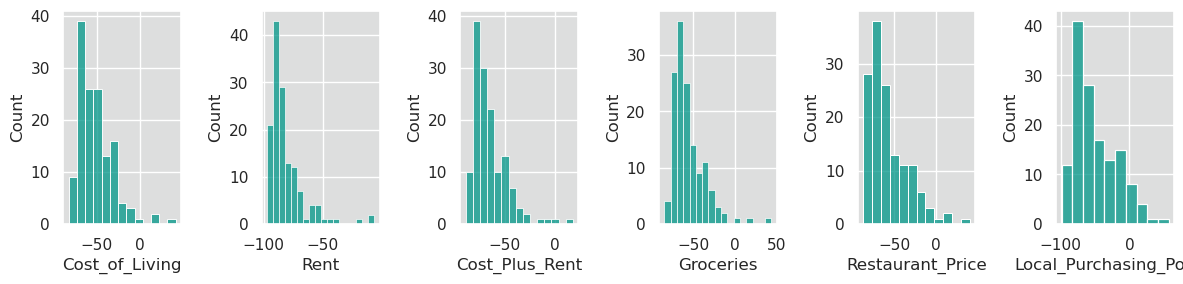

In [22]:
fig, ax = plt.subplots(1,6, figsize = (12,3))

for i, i_col in enumerate(cols):
    sns.histplot(
        ax = ax[i],
        data = df_cost,
        x = i_col,
        color = '#009688'
    )

plt.tight_layout()

> All variables are skewed to the left

## Boxplot

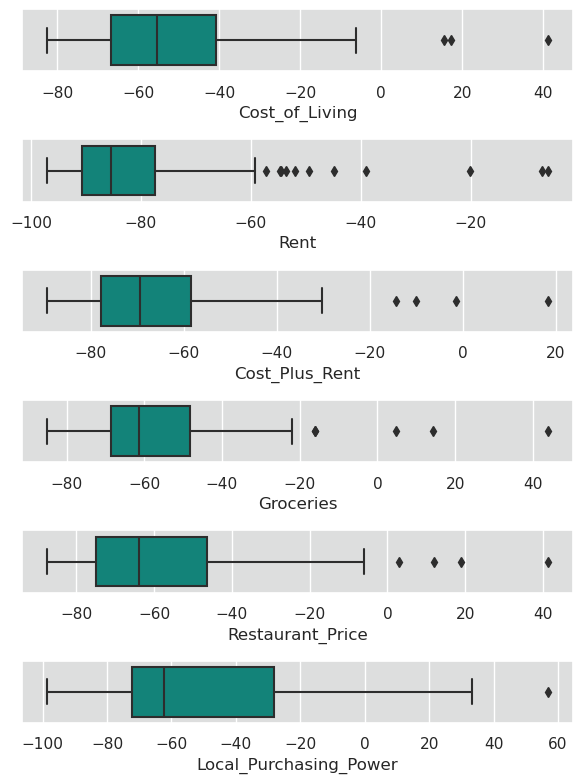

In [23]:
fig, ax = plt.subplots(6, figsize = (6,8))

for i, i_col in enumerate(cols):
    sns.boxplot(
        ax = ax[i],
        data = df_cost,
        x = i_col,
        color = '#009688'
    )

plt.tight_layout()

> There are a lot of outliers, it will be removed to a general analysis. But we need all data for a deep exploring

### Per Continent

In [24]:
df_cost.columns

Index(['Country', 'Cost_of_Living', 'Rent', 'Cost_Plus_Rent', 'Groceries',
       'Restaurant_Price', 'Local_Purchasing_Power', 'Continente'],
      dtype='object')

<Axes: xlabel='Cost_of_Living', ylabel='Continente'>

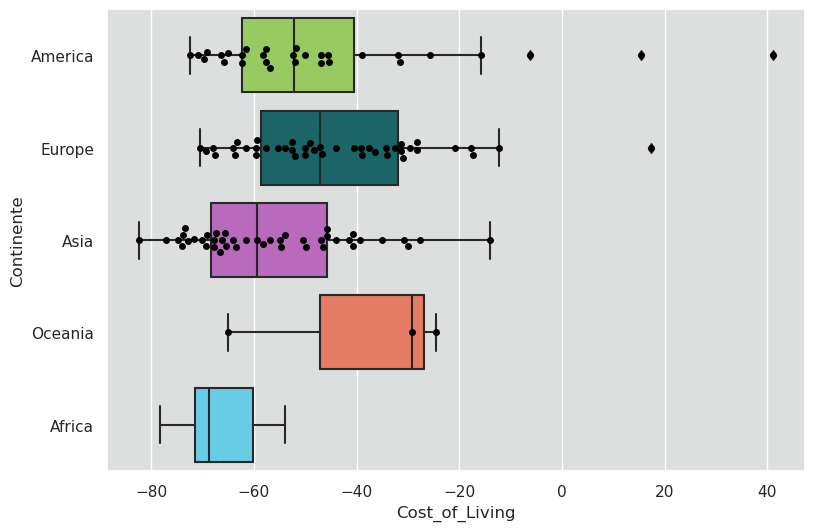

In [25]:
sns.boxplot(
    data = df_cost,
    x = 'Cost_of_Living',
    y = 'Continente',
    palette = continent_color
)

sns.swarmplot(
    data = df_cost,
    x = 'Cost_of_Living',
    y = 'Continente',
    color = 'black'
)

# Remove Outliers 

In [26]:
%run pandas-missing-extension.ipynb #New objet to analyze missing data

In [27]:
def Remove_Outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

In [28]:
outliers = Remove_Outlier(df_cost)
out_cost = df_cost[outliers]

/tmp/ipykernel_772/1591930294.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
/tmp/ipykernel_772/1591930294.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
/tmp/ipykernel_772/1591930294.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))


In [29]:
out_cost[['Local_Purchasing_Power','Continente']]

,Local_Purchasing_Power,Continente
0,-24.1,America
1,10.8,Europe
2,-28.6,America
3,-62.6,America
4,0.4,Europe
...,...,...
135,-68.4,Africa
136,-90.6,Africa
137,-38.3,Asia
138,-82.6,Africa


In [30]:
(
    out_cost
    .isnull()
    .sum()
)

Country                    0
Cost_of_Living             3
Rent                      11
Cost_Plus_Rent             4
Groceries                  5
Restaurant_Price           4
Local_Purchasing_Power     1
Continente                 2
dtype: int64

In [31]:
(
    out_cost
    .isnull()
    .sum()
    .sum()
)

30

## Visualization missing values

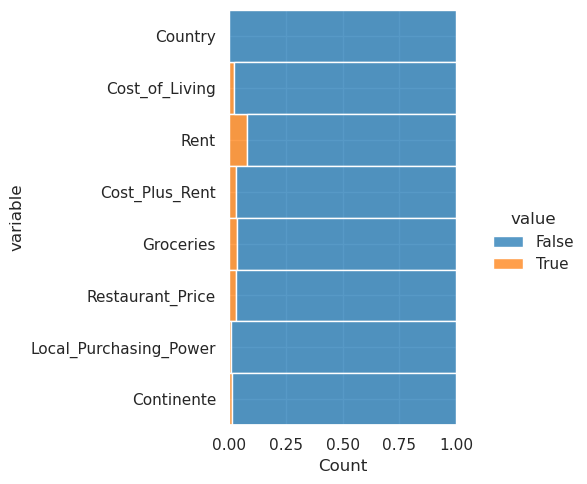

In [32]:
#documenta porque se eliminaron los datos

(
    out_cost
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill'
            )
        )
    )
)

> Rent variable is more missing than the others variables

<Axes: >

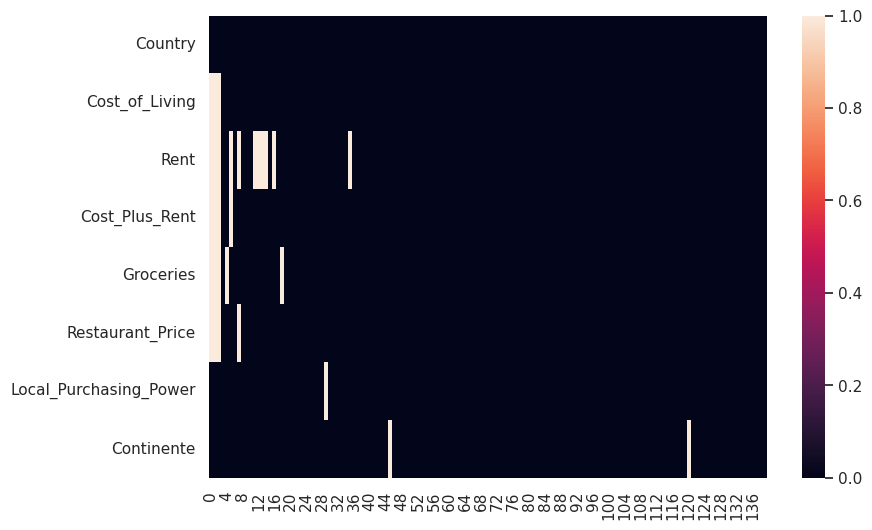

In [33]:
(
    out_cost
    .isnull()
    .transpose()
    .pipe(
        lambda df:(
            sns.heatmap(
                data = df
            )
        )
    )
)

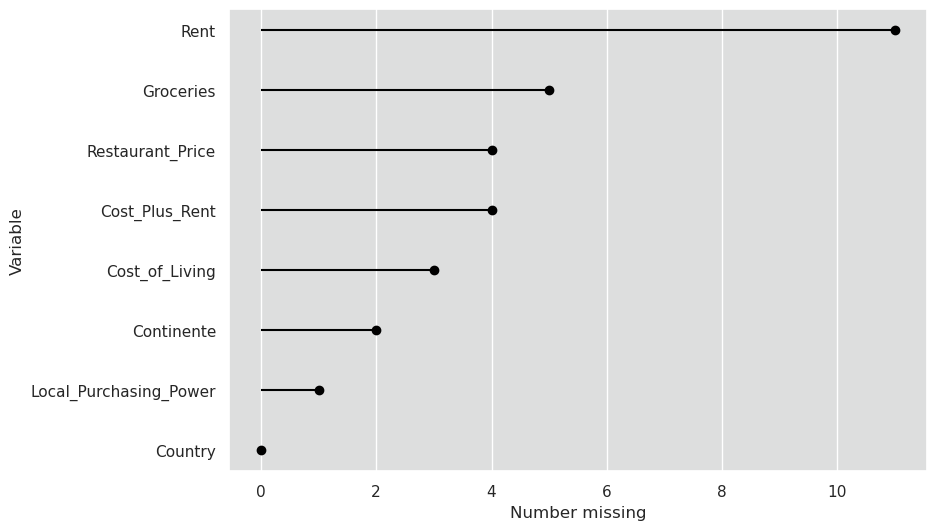

In [34]:
out_cost.missing.missing_variable_plot()

## Missigno to look missing value 

<Axes: >

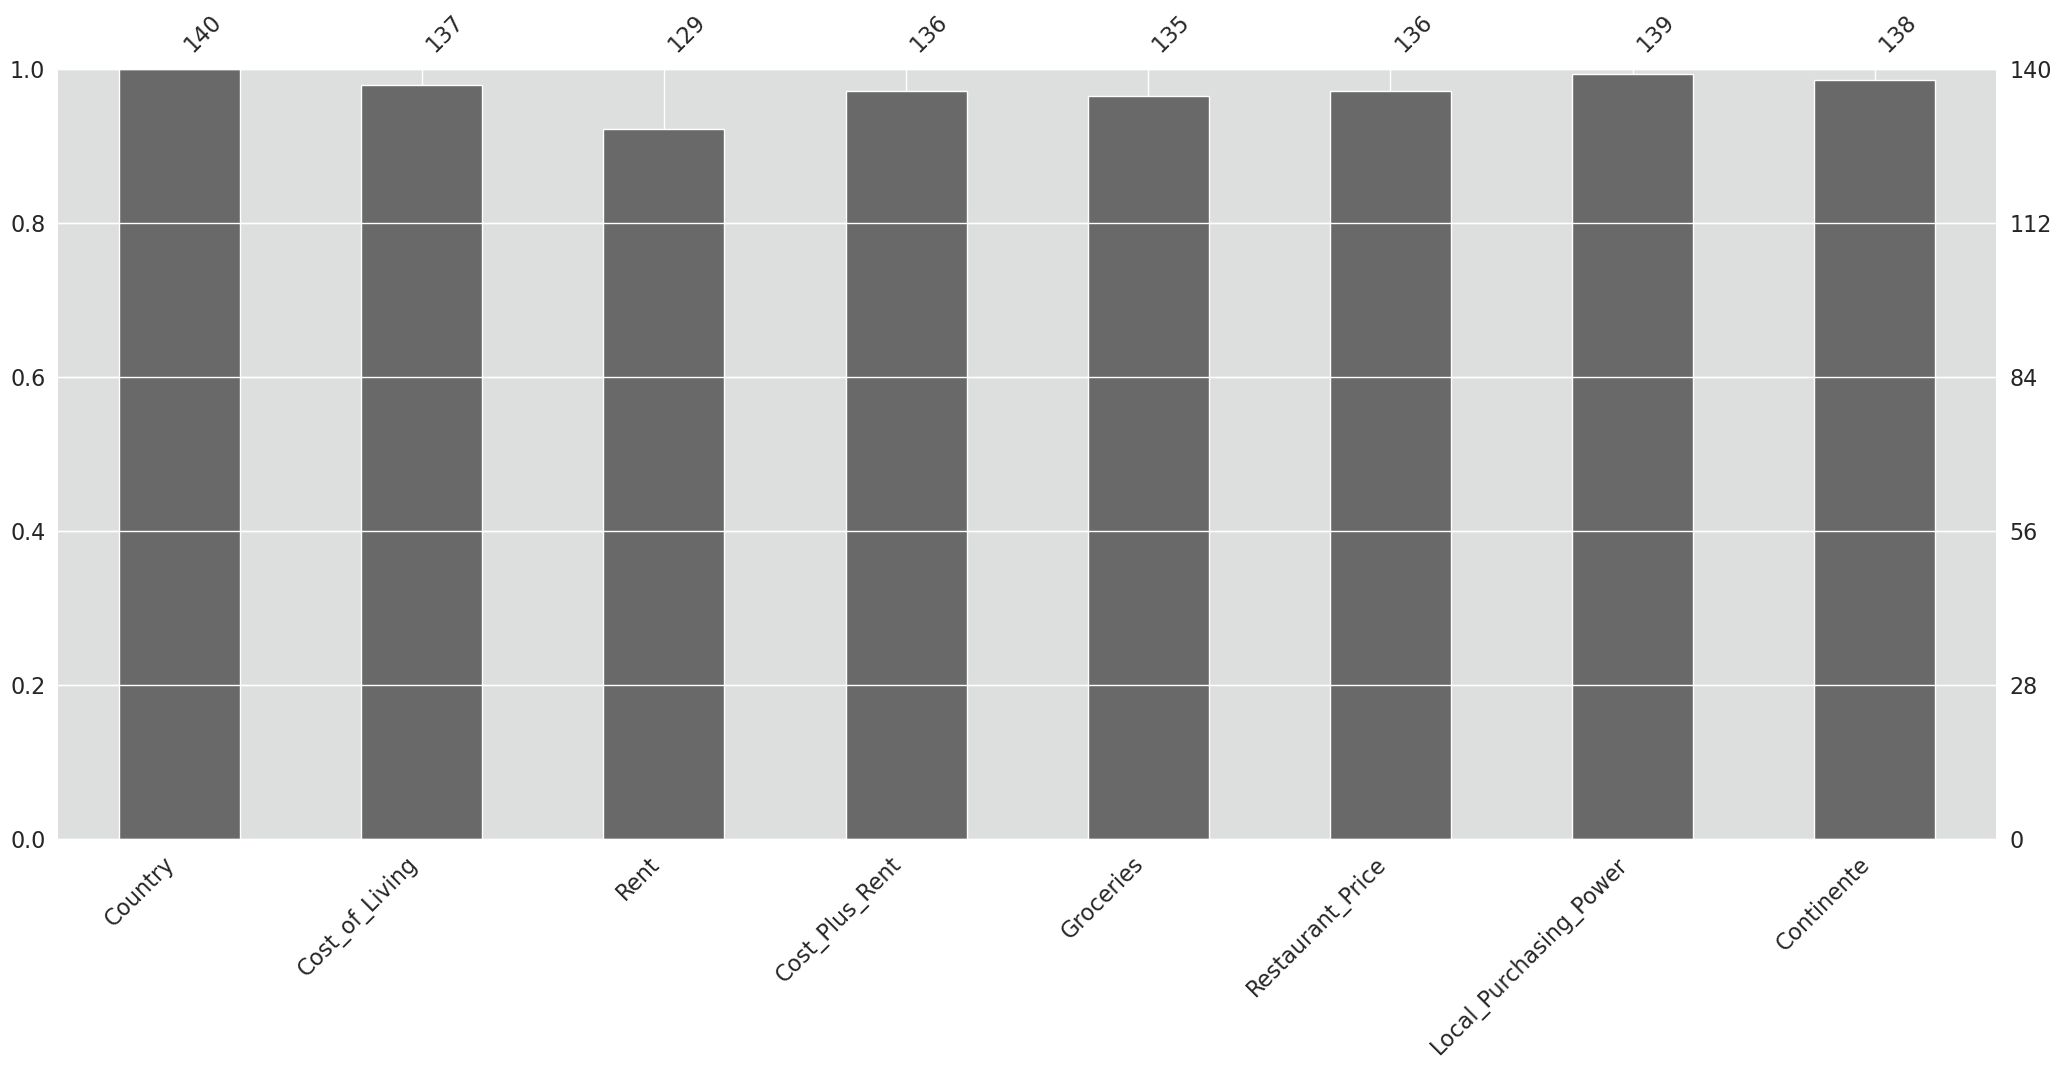

In [35]:
missingno.bar(df = out_cost)

<Axes: >

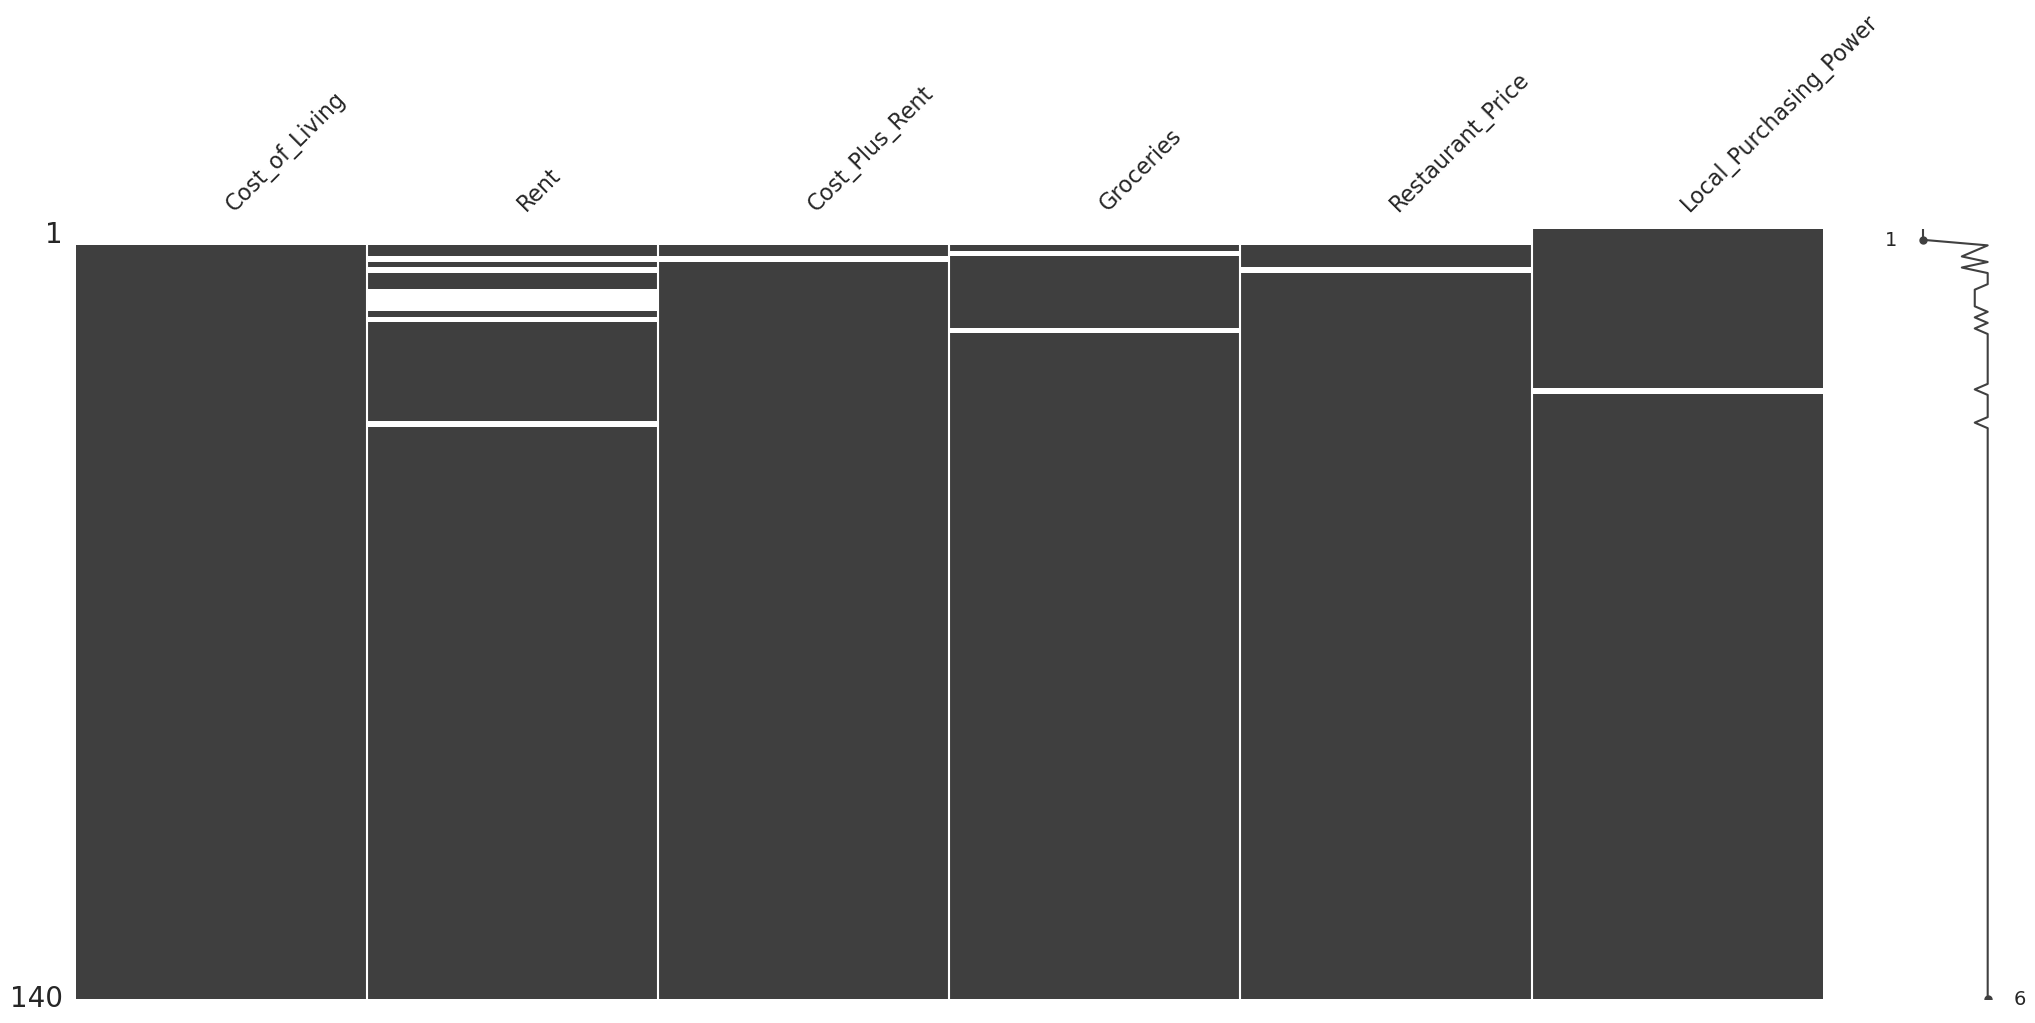

In [36]:
missingno.matrix(df = out_cost.select_dtypes(np.number))

# Heatmap

/tmp/ipykernel_772/4231431372.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  upp_mat = np.triu(out_cost.corr())
/tmp/ipykernel_772/4231431372.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = out_cost.corr(),
/home/edwlearn/anaconda3/envs/best/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

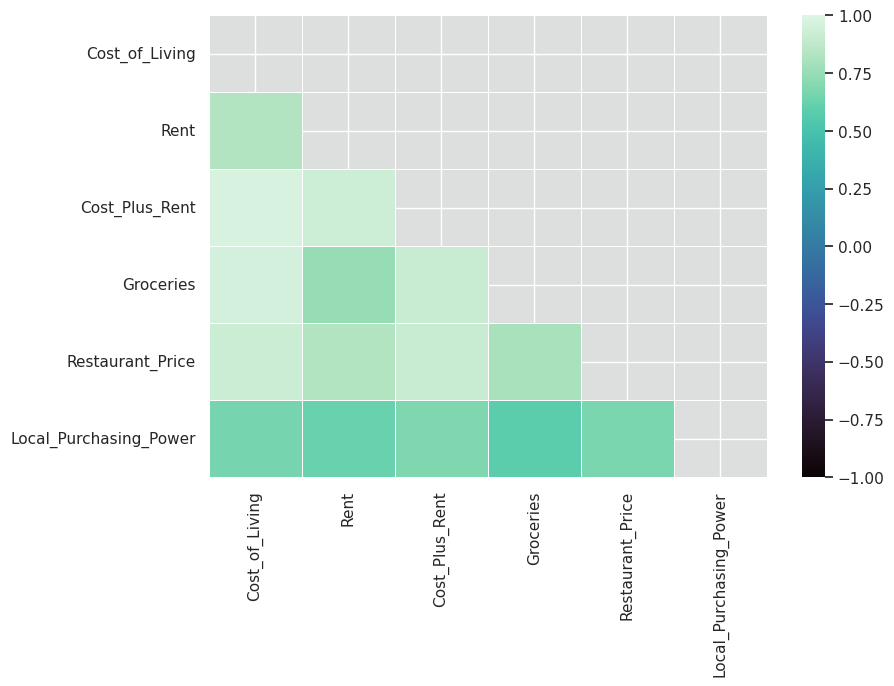

In [37]:
# Create a Heatmap before scatterplot, because we need to know which ones have more relation
upp_mat = np.triu(out_cost.corr())

sns.heatmap(
    data = out_cost.corr(), 
    cmap='mako',
     center = 0,
     vmin = -1,
     vmax = 1,
     annot = True,
     linewidths= 0.5,
     mask = upp_mat
)

> 'Local_Purchasing_Power' is the variable with more correlation, this observation is powerful, because now we can focus into it

# Correlations

## Cost_of_Living ~

### Restaurant Price

<Axes: xlabel='Restaurant_Price', ylabel='Cost_of_Living'>

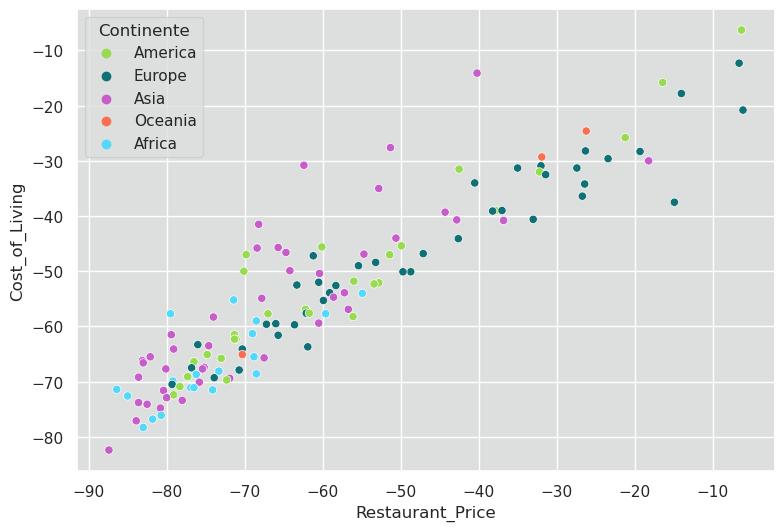

In [38]:
sns.scatterplot(
    data = out_cost,
    x = 'Restaurant_Price',
    y = 'Cost_of_Living',
    hue = 'Continente',
    palette= continent_color
)

As is logical, if cost of life is upper, the restaurant price increase too

### Groceries 

<Axes: xlabel='Groceries', ylabel='Cost_of_Living'>

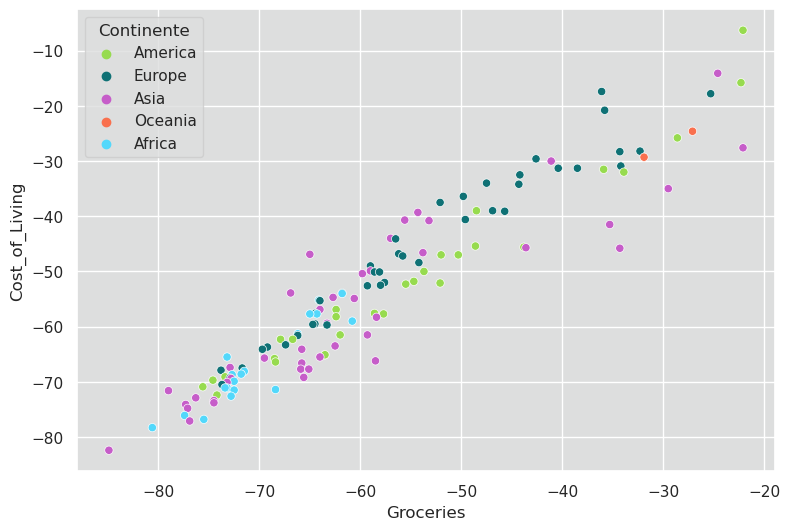

In [39]:
sns.scatterplot(
    data = out_cost,
    x = 'Groceries',
    y = 'Cost_of_Living',
    hue = 'Continente',
    palette= continent_color
)

### Rent

<Axes: xlabel='Rent', ylabel='Cost_of_Living'>

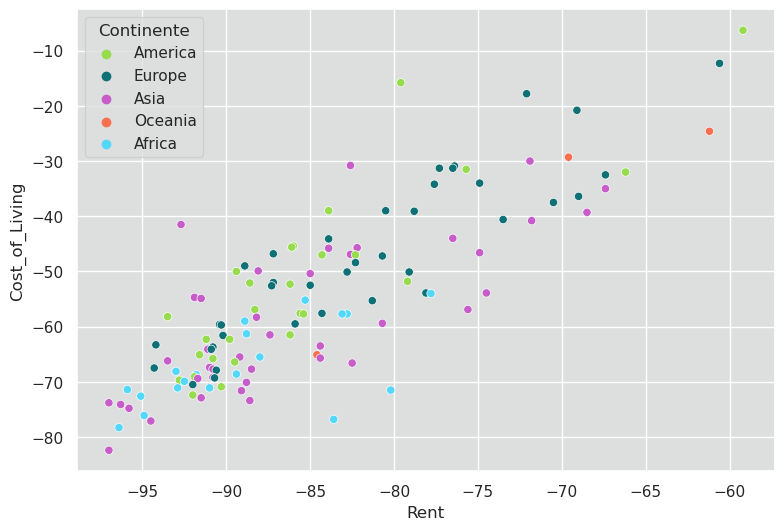

In [40]:
sns.scatterplot(
    data = out_cost,
    x = 'Rent',
    y = 'Cost_of_Living',
    hue = 'Continente',
    palette= continent_color
)

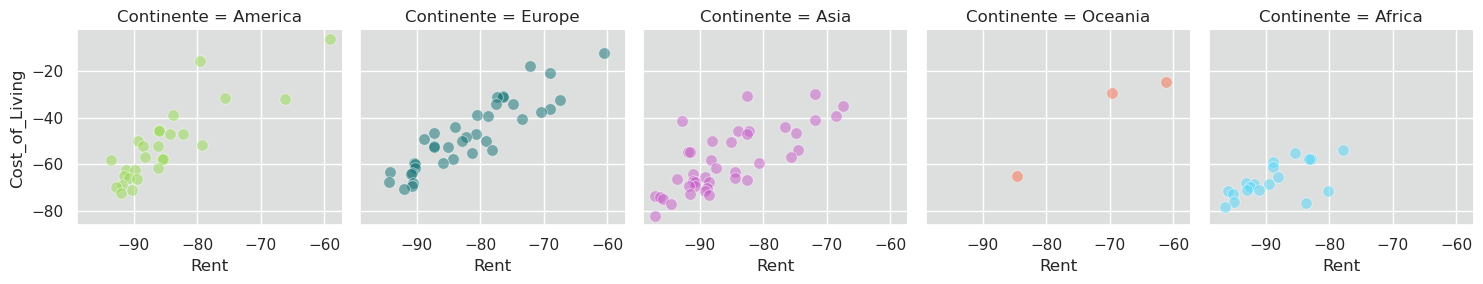

In [41]:
sns.FacetGrid(
    out_cost, 
    col = 'Continente', 
    hue= 'Continente',
    palette= continent_color
    ).map(sns.scatterplot,
        'Rent',
        'Cost_of_Living',
        alpha= 1/2,
        s= 70
        )

> We separate by 'Continente' for better visualization. We can conclude that 'Cost_of_Living' have a correlation with the other variables

### Local_Purchasing_Power

<Axes: xlabel='Cost_of_Living', ylabel='Local_Purchasing_Power'>

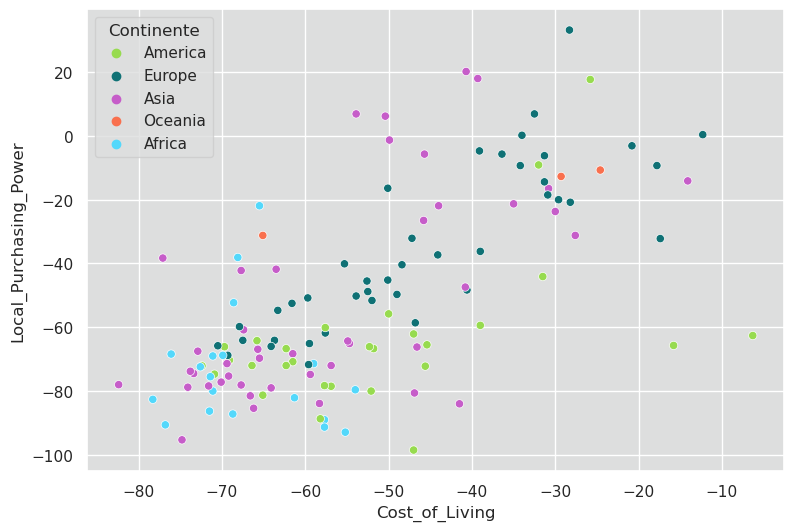

In [42]:
sns.scatterplot(
    data = out_cost,
    x = 'Cost_of_Living',
    y = 'Local_Purchasing_Power',
    hue = 'Continente',
    palette= continent_color
)

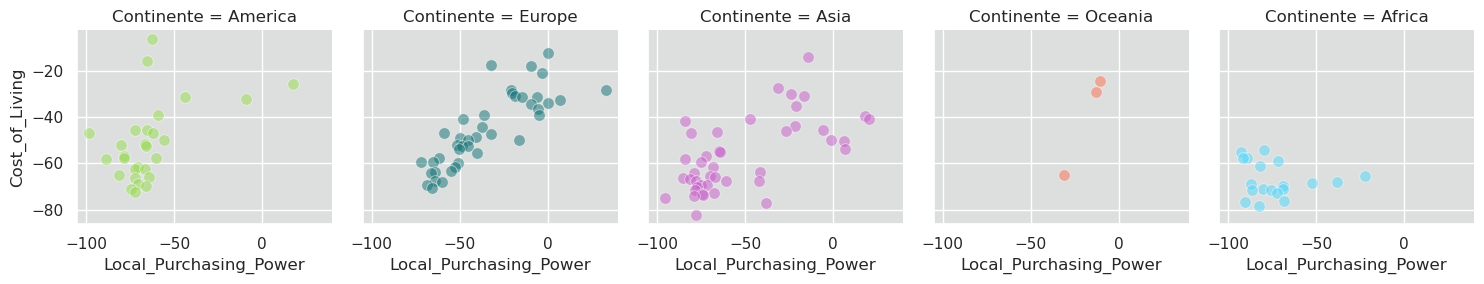

In [43]:
sns.FacetGrid(
    out_cost, 
    col = 'Continente', 
    hue= 'Continente',
    palette= continent_color
    ).map(sns.scatterplot,
        'Local_Purchasing_Power',
        'Cost_of_Living',
        alpha= 1/2,
        s= 70
        )

> In the heatmap we could see that 'Local_Purchasing_Power' have low correlation than the other variables, but in the visualization we can conclude that this variable also have correlation and this have more impact in some continents.

Some continent like America and Africa don't continue the tendency, but the others variables do.

## Rent ~

### Local_Purchasing_Power

<Axes: xlabel='Local_Purchasing_Power', ylabel='Rent'>

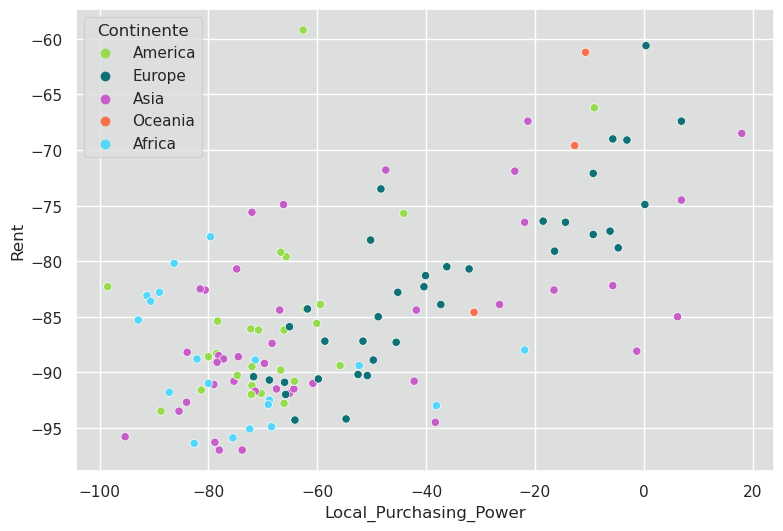

In [44]:
sns.scatterplot(
    out_cost,
    x = 'Local_Purchasing_Power',
    y = 'Rent',
    hue = 'Continente',
    palette = continent_color
)

> We continue seeing that 'Local_Purchasing_Power' have a lot of importance

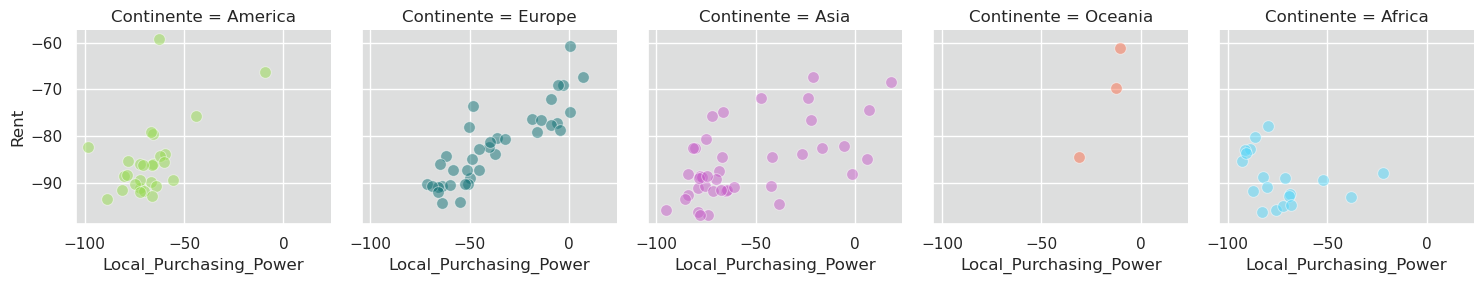

In [45]:
sns.FacetGrid(
    data = out_cost,
    col = 'Continente',
    hue = 'Continente',
    palette= continent_color
).map(
    sns.scatterplot,
    'Local_Purchasing_Power',
    'Rent',
    alpha = 1/2,
    s = 70
)

## Groceries ~

### Rent

<Axes: xlabel='Rent', ylabel='Groceries'>

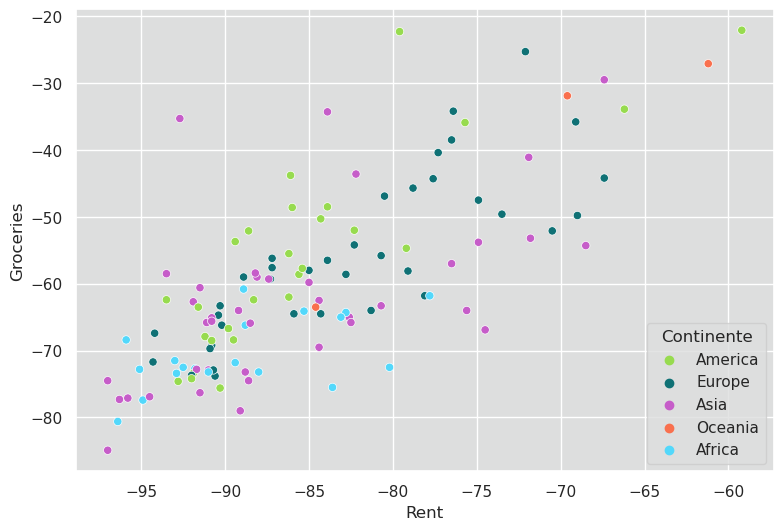

In [46]:
sns.scatterplot(
    out_cost,
    x = 'Rent',
    y = 'Groceries',
    hue = 'Continente',
    palette= continent_color
)

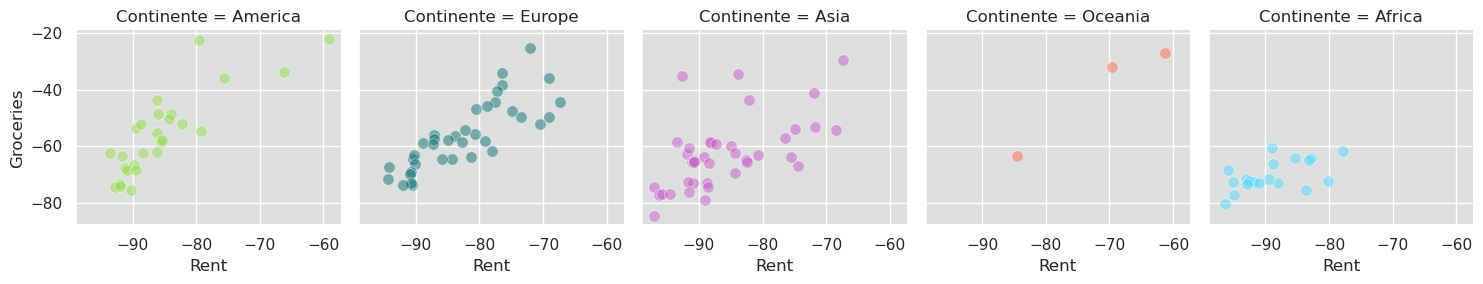

In [47]:
sns.FacetGrid(
    out_cost,
    col = 'Continente',
    hue = 'Continente',
    palette= continent_color
).map(
    sns.scatterplot,
    'Rent',
    'Groceries',
    alpha = 1/2,
    s = 70
    )

> Most variables have a linear correlation because  it belongs at same dataset (In this case). Some variables like 'Local_Purchasing_Power' has a more important correlation 

# Question About Variable

## Per Continent

In [48]:
df_america = df_cost[df_cost['Continente'] == 'America']
df_europe = df_cost[df_cost['Continente'] == 'Europe']
df_asia = df_cost[df_cost['Continente'] == 'Asia']
df_oceania = df_cost[df_cost['Continente'] == 'Oceania']
df_africa = df_cost[df_cost['Continente'] == 'Africa']

> Separate into their respective continents

## America

- Top 5 best and less Cost_of_Living

In [49]:
expensive_ame = df_america.sort_values(by = ['Cost_of_Living'], ascending= False).head(5)
cheapest_ame = df_america.sort_values(by = ['Cost_of_Living'], ascending= False).tail(5)

<Axes: xlabel='Country', ylabel='Cost_of_Living'>

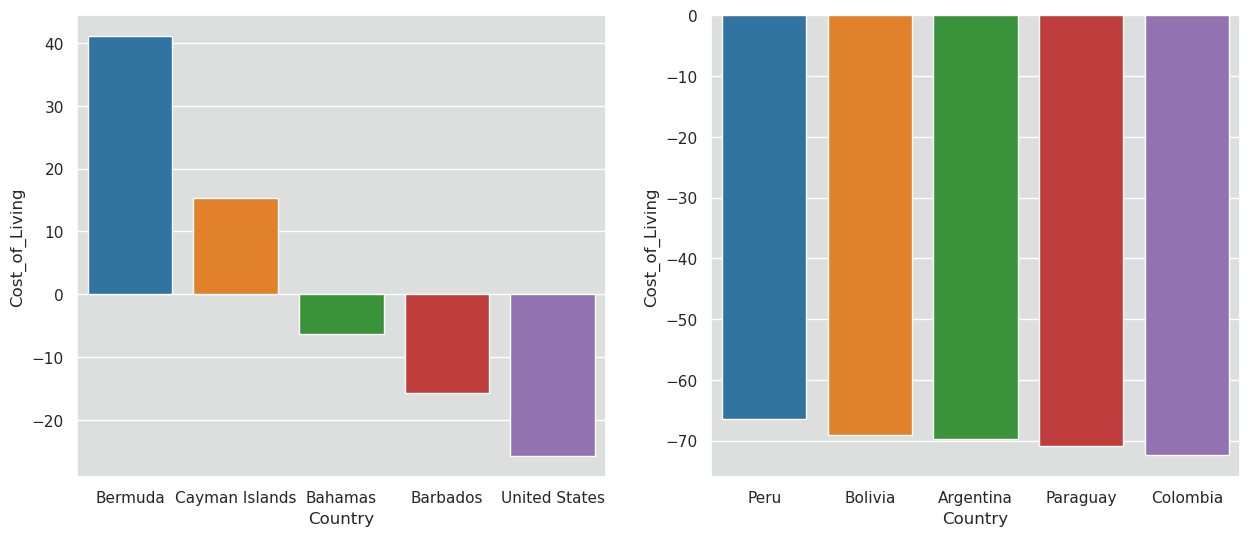

In [50]:
fig, ax = plt.subplots(1,2,figsize = (15,6))

sns.barplot(
    expensive_ame,
    x = 'Country',
    y = 'Cost_of_Living',
    ax = ax[0]
)

sns.barplot(
    cheapest_ame,
    x = 'Country',
    y = 'Cost_of_Living',
    ax = ax[1]
)

Bermuda is the most expensive country to live in America and World, It is 41.8% expensive than New York City
Colombia is the cheapest country to live. It's 76.9% less than New York City

- Best Country (Talking about cost)

In [51]:
print(f' America:{df_america.shape} \n Europa:{df_europe.shape} \n Asia:{df_asia.shape} \n Africa:{df_africa.shape} \n World:{df_cost.shape}' )

 America:(30, 8) 
 Europa:(43, 8) 
 Asia:(43, 8) 
 Africa:(19, 8) 
 World:(140, 8)


In [52]:
ame = (
    df_america['Country']
    .pipe(lambda df:(
        np.floor(df.count() / 2))
    )
).astype(int)

eur = (
    df_europe['Country']
    .pipe(lambda df:(
        np.floor(df.count() / 2))
    )
).astype(int)

asi = (
    df_asia['Country']
    .pipe(lambda df:(
        np.floor(df.count() / 2))
    )
).astype(int)

afr = (
    df_africa['Country']
    .pipe(lambda df:(
        np.floor(df.count() / 2))
    )
).astype(int)

It makes for each continent divide by 2, but some odd number of countries. For that reason 'floor' round this

In [53]:
def div(df):
    n = (
        df['Country']
        .pipe(lambda df:(
            np.floor(df.count() / 2))
        )
    ).astype(int)
    return n

This function has the same functionality as before code

## America

In [54]:
# lowest_cost_ame = df_america.sort_values('Cost_of_Living', ascending=True).head(div(df_america))
# highest_local_ame = df_america.sort_values('Local_Purchasing_Power', ascending=False).head(div(df_america))
# highest_local_ame[['Country', 'Cost_of_Living', 'Local_Purchasing_Power']].sort_values('Local_Purchasing_Power', ascending=False)
# # cost_countries_ame = lowest_cost_ame[lowest_cost_ame.isin(highest_local_ame)].dropna()
# #cost_countries_ame[['Country', 'Cost_of_Living', 'Local_Purchasing_Power']].sort_values('Local_Purchasing_Power', ascending=False)


# lowest_rent_ame = df_america.sort_values('Rent', ascending=True).head(div(df_america))
# rent_ame = lowest_rent_ame[lowest_rent_ame.isin(cost_countries_ame)].dropna()

# lowest_groceries_ame = df_america.sort_values('Groceries', ascending= True).head(div(df_america))
# groceries_ame = lowest_groceries_ame[lowest_groceries_ame.isin(rent_ame)].dropna()
# groceries_ame[['Country', 'Cost_of_Living', 'Local_Purchasing_Power']].sort_values('Local_Purchasing_Power', ascending=False)

### I was creating a interseption, between a lowest cost and higest purchasing power. But that had a problem, just filter the middle, suposse if a country have higest local_Purchasing_power than cost of living mean that you can live 'free'


In [55]:
# If more difference have, it's mean that is a better place
df_america['Difference'] = df_america['Local_Purchasing_Power'] - df_america['Cost_Plus_Rent']

# Filtrar países donde el Local_Purchasing_Power es mayor que el Cost_of_Living
lowest_price_americas = (
    df_america[df_america['Local_Purchasing_Power'] > df_america['Cost_Plus_Rent']]
)

higgest_difference = df_america.sort_values('Difference', ascending=False).head(15)

higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power', 'Groceries']]

/tmp/ipykernel_772/1280594786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_america['Difference'] = df_america['Local_Purchasing_Power'] - df_america['Cost_Plus_Rent']


,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
11,United States,56.7,-39.0,17.7,-28.6
23,Canada,39.2,-48.3,-9.1,-33.9
117,Argentina,14.6,-80.7,-66.1,-74.6
101,Ecuador,13.5,-77.7,-64.2,-68.5
54,Belize,13.0,-68.8,-55.8,-53.7
74,Mexico,10.8,-70.9,-60.1,-58.6
113,Bolivia,9.7,-80.0,-70.3,-73.4
128,Colombia,9.6,-81.7,-72.1,-74.2
90,Honduras,8.7,-75.4,-66.7,-66.7
22,Puerto Rico,8.4,-52.5,-44.1,-35.9


In [56]:
higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power']].head()

,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power
11,United States,56.7,-39.0,17.7
23,Canada,39.2,-48.3,-9.1
117,Argentina,14.6,-80.7,-66.1
101,Ecuador,13.5,-77.7,-64.2
54,Belize,13.0,-68.8,-55.8


Se crea una intersección entre los paises que tenga un costo de vida bajo, pero con un poder adquisitivo alto. Eso quiere decir: Paises baratos dónde se gane bastante. 

A ese filtro se le agregan la differencia entre ambos el costo de vida+renta y el poder adquisitivo. entre mayor sea el rango, mejor será para vivir en cuestión de costo

### Top 5 best country lo live in America (Talking about cost) are:  
1. United States
2. Canada
3. Argentina
4. Ecuador
5. Belize

## Europe

In [57]:
# If more difference have, it's mean that is a better place
df_europe['Difference'] = df_europe['Local_Purchasing_Power'] - df_europe['Cost_Plus_Rent']

# Filtrar países donde el Local_Purchasing_Power es mayor que el Cost_of_Living
lowest_price_europe = (
    df_europe[df_europe['Local_Purchasing_Power'] > df_europe['Cost_Plus_Rent']]
)

higgest_difference = df_europe.sort_values('Difference', ascending=False).head(15)

higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power', 'Groceries']]



/tmp/ipykernel_772/3737601443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_europe['Difference'] = df_europe['Local_Purchasing_Power'] - df_europe['Cost_Plus_Rent']


,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
29,Isle Of Man,110.0,-53.2,56.8,-52.1
14,Luxembourg,73.9,-40.7,33.2,-34.3
24,Netherlands,56.0,-49.1,6.9,-44.2
25,Germany,53.7,-53.5,0.2,-47.5
32,Sweden,53.3,-58.0,-4.7,-45.7
56,Spain,47.5,-63.9,-16.4,-58.1
21,Finland,47.0,-53.2,-6.2,-40.4
28,United Kingdom,46.2,-51.9,-5.7,-49.8
26,Belgium,45.5,-54.8,-9.3,-44.3
9,Denmark,40.7,-43.8,-3.1,-35.8


In [58]:
higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power']].head()

,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power
29,Isle Of Man,110.0,-53.2,56.8
14,Luxembourg,73.9,-40.7,33.2
24,Netherlands,56.0,-49.1,6.9
25,Germany,53.7,-53.5,0.2
32,Sweden,53.3,-58.0,-4.7


## Asia

In [59]:
# If more difference have, it's mean that is a better place
df_asia['Difference'] = df_asia['Local_Purchasing_Power'] - df_asia['Cost_Plus_Rent']

# Filtrar países donde el Local_Purchasing_Power es mayor que el Cost_of_Living
lowest_price_europe = (
    df_asia[df_asia['Local_Purchasing_Power'] > df_asia['Cost_Plus_Rent']]
)

higgest_difference = df_asia.sort_values('Difference', ascending=False).head(15)

higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power', 'Groceries']]

/tmp/ipykernel_772/2971834584.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asia['Difference'] = df_asia['Local_Purchasing_Power'] - df_asia['Cost_Plus_Rent']


,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
57,Oman,73.1,-66.9,6.2,-59.8
33,United Arab Emirates,71.2,-53.2,18.0,-54.3
65,Kuwait,70.6,-63.7,6.9,-66.9
35,Qatar,67.6,-47.4,20.2,-55.6
53,Saudi Arabia,66.8,-68.1,-1.3,-59.0
42,Japan,57.4,-63.1,-5.7,-43.6
137,India,47.1,-85.4,-38.3,-76.9
18,South Korea,39.0,-55.5,-16.5,-16.0
38,Bahrain,37.6,-59.5,-21.9,-57.0
43,Brunei,37.5,-64.0,-26.5,-34.3


In [60]:
(
    higgest_difference[
        ['Country',
         'Difference',
         'Cost_Plus_Rent', 
         'Local_Purchasing_Power', 
         'Groceries'
        ]
    ].head()
)

,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
57,Oman,73.1,-66.9,6.2,-59.8
33,United Arab Emirates,71.2,-53.2,18.0,-54.3
65,Kuwait,70.6,-63.7,6.9,-66.9
35,Qatar,67.6,-47.4,20.2,-55.6
53,Saudi Arabia,66.8,-68.1,-1.3,-59.0


## Africa

In [61]:
# If more difference have, it's mean that is a better place
df_africa['Difference'] = df_africa['Local_Purchasing_Power'] - df_africa['Cost_Plus_Rent']

# Filtrar países donde el Local_Purchasing_Power es mayor que el Cost_of_Living
lowest_price_europe = (
    df_africa[df_africa['Local_Purchasing_Power'] > df_africa['Cost_Plus_Rent']]
)

higgest_difference = df_africa.sort_values('Difference', ascending=False).head(15)

higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power', 'Groceries']]

/tmp/ipykernel_772/3410864670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa['Difference'] = df_africa['Local_Purchasing_Power'] - df_africa['Cost_Plus_Rent']


,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
98,South Africa,54.3,-76.2,-21.9,-73.2
110,Botswana,41.9,-80.0,-38.1,-71.5
111,Namibia,26.2,-78.5,-52.3,-71.8
135,Libya,16.7,-85.1,-68.4,-77.4
124,Kenya,12.5,-81.5,-69.0,-73.4
118,Morocco,11.8,-80.6,-68.8,-72.5
129,Tunisia,10.9,-83.3,-72.4,-72.8
125,Algeria,7.6,-83.1,-75.5,-68.4
138,Egypt,4.3,-86.9,-82.6,-80.6
80,Mauritius,1.8,-73.2,-71.4,-60.8


In [62]:
(
    higgest_difference[
        ['Country',
         'Difference',
         'Cost_Plus_Rent', 
         'Local_Purchasing_Power', 
         'Groceries'
        ]
    ].head()
)

,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
98,South Africa,54.3,-76.2,-21.9,-73.2
110,Botswana,41.9,-80.0,-38.1,-71.5
111,Namibia,26.2,-78.5,-52.3,-71.8
135,Libya,16.7,-85.1,-68.4,-77.4
124,Kenya,12.5,-81.5,-69.0,-73.4


## World

In [63]:
# If more difference have, it's mean that is a better place
df_cost['Difference'] = df_cost['Local_Purchasing_Power'] - df_cost['Cost_Plus_Rent']

# Filtrar países donde el Local_Purchasing_Power es mayor que el Cost_of_Living
lowest_price_europe = (
    df_cost[df_cost['Local_Purchasing_Power'] > df_cost['Cost_Plus_Rent']]
)

higgest_difference = df_cost.sort_values('Difference', ascending=False).head(30)

higgest_difference[['Country','Difference','Cost_Plus_Rent', 'Local_Purchasing_Power', 'Groceries']]


,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
29,Isle Of Man,110.0,-53.2,56.8,-52.1
14,Luxembourg,73.9,-40.7,33.2,-34.3
57,Oman,73.1,-66.9,6.2,-59.8
33,United Arab Emirates,71.2,-53.2,18.0,-54.3
65,Kuwait,70.6,-63.7,6.9,-66.9
35,Qatar,67.6,-47.4,20.2,-55.6
53,Saudi Arabia,66.8,-68.1,-1.3,-59.0
42,Japan,57.4,-63.1,-5.7,-43.6
11,United States,56.7,-39.0,17.7,-28.6
24,Netherlands,56.0,-49.1,6.9,-44.2


In [64]:
(
    higgest_difference[
        ['Country',
         'Difference',
         'Cost_Plus_Rent', 
         'Local_Purchasing_Power', 
         'Groceries'
        ]
    ].head(10)
)

,Country,Difference,Cost_Plus_Rent,Local_Purchasing_Power,Groceries
29,Isle Of Man,110.0,-53.2,56.8,-52.1
14,Luxembourg,73.9,-40.7,33.2,-34.3
57,Oman,73.1,-66.9,6.2,-59.8
33,United Arab Emirates,71.2,-53.2,18.0,-54.3
65,Kuwait,70.6,-63.7,6.9,-66.9
35,Qatar,67.6,-47.4,20.2,-55.6
53,Saudi Arabia,66.8,-68.1,-1.3,-59.0
42,Japan,57.4,-63.1,-5.7,-43.6
11,United States,56.7,-39.0,17.7,-28.6
24,Netherlands,56.0,-49.1,6.9,-44.2


# Probability Distributions: PMFs, CDFs y PDFs

## Mass Probability Function (PMFs)

### Using Seaborn

<Axes: xlabel='Local_Purchasing_Power', ylabel='Probability'>

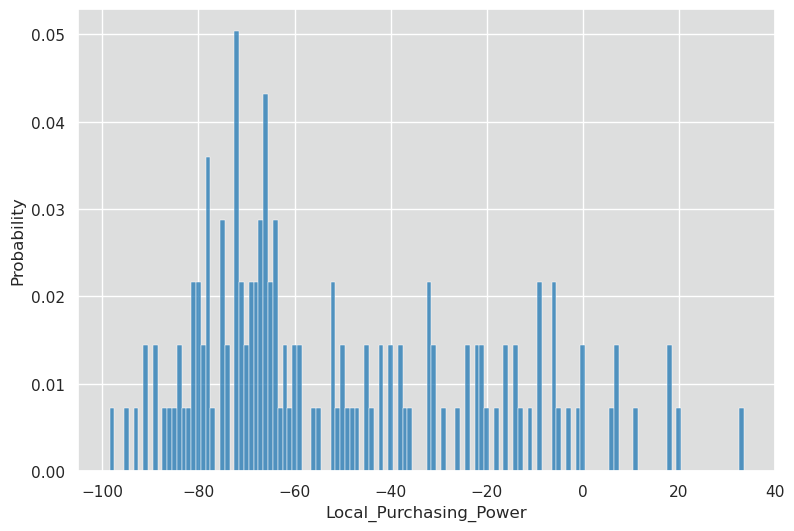

In [65]:
sns.histplot(
    data = out_cost,
    x = 'Local_Purchasing_Power',
    binwidth= 1,
    stat = 'probability'
)

<Axes: xlabel='Cost_of_Living', ylabel='Probability'>

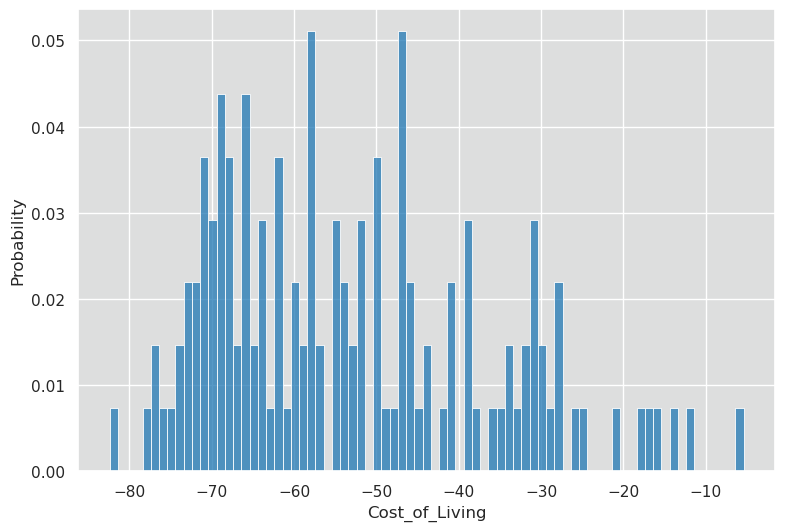

In [66]:
sns.histplot(
    data = out_cost,
    x = 'Cost_of_Living',
    binwidth=1,
    stat= 'probability'
)

### Using Empiricaldist

In [67]:
pmf_purchasing_power = empiricaldist.Pmf.from_seq(
    out_cost['Local_Purchasing_Power'],
    normalize= True
)
pmf_purchasing_power

,probs
-98.5,0.007194
-95.3,0.007194
-92.9,0.007194
-91.3,0.007194
-90.6,0.007194
...,...
10.8,0.007194
17.7,0.007194
18.0,0.007194
20.2,0.007194


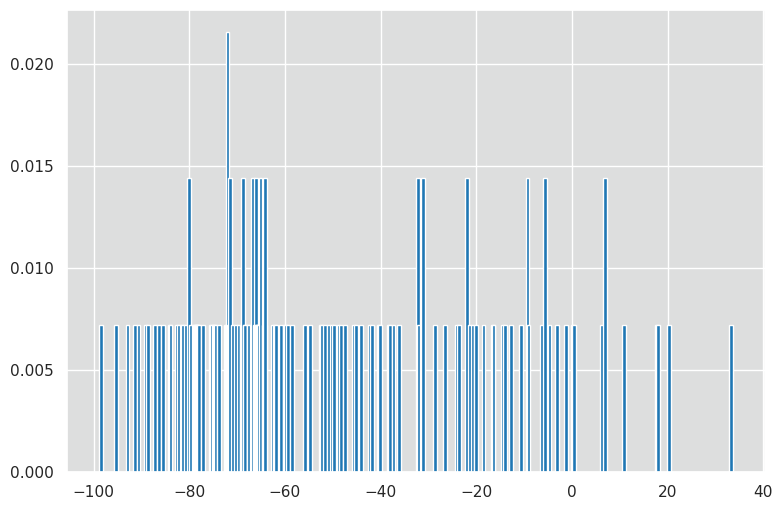

In [68]:
pmf_purchasing_power.bar()

In this case, don´t function empiricaldist to visualization.

In [69]:
pmf_purchasing_power(7.8)

0

## Probability Function acumulada (ECDFs)

> Find a <= value in variable

### Local_Purchasing_Power

#### Using Seaborn

<Axes: xlabel='Local_Purchasing_Power', ylabel='Proportion'>

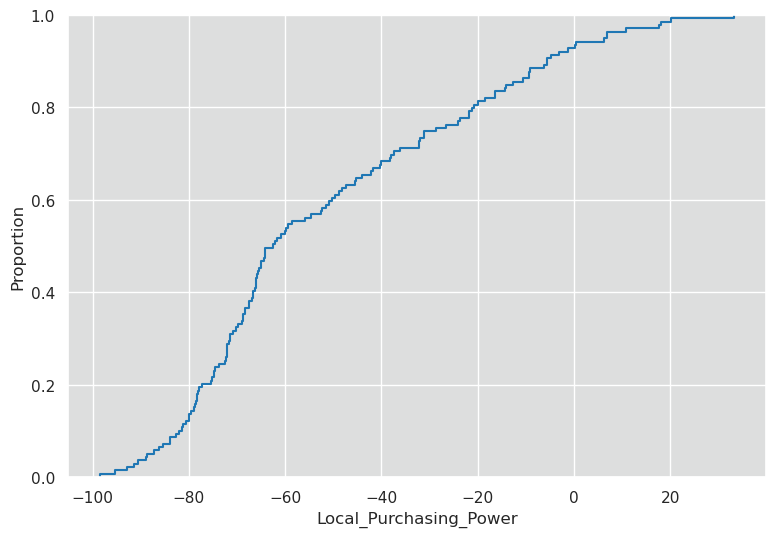

In [70]:
sns.ecdfplot(
    data = out_cost,
    x = 'Local_Purchasing_Power'
)

#### Using empiricaldist

In [71]:
cdf_local_purchasing =empiricaldist.Cdf.from_seq(
    out_cost['Local_Purchasing_Power'],
    normalize= True
)

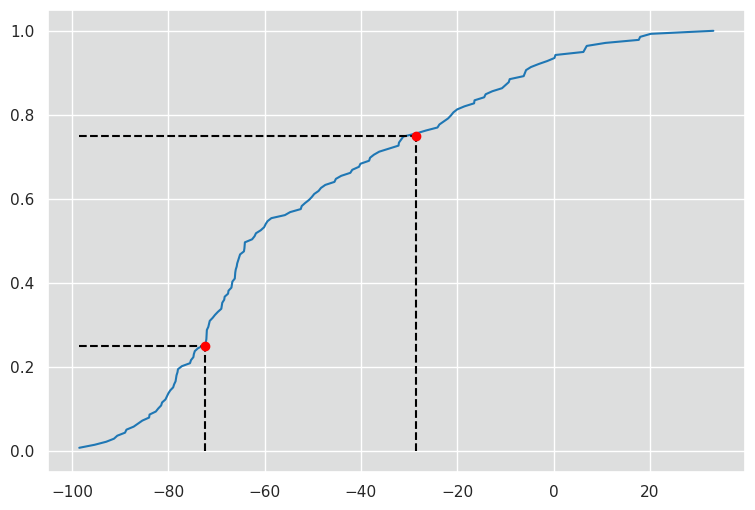

In [72]:
cdf_local_purchasing.plot()

p_1 = 0.25
p_2 = 0.75

ps = (0.25, 0.75)
qs = cdf_local_purchasing.inverse(ps)


plt.vlines(
    x = qs,
    ymin = 0,
    ymax = ps,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
    y = ps,
    xmin = pmf_purchasing_power.qs[0],
    xmax = qs,
    color = 'black',
    linestyle = 'dashed'
)


plt.scatter(
    x= qs,
    y = ps,
    color = 'red',
    zorder = 2
)

### Cost_of_Living

#### Using Seaborn

<Axes: xlabel='Cost_of_Living', ylabel='Proportion'>

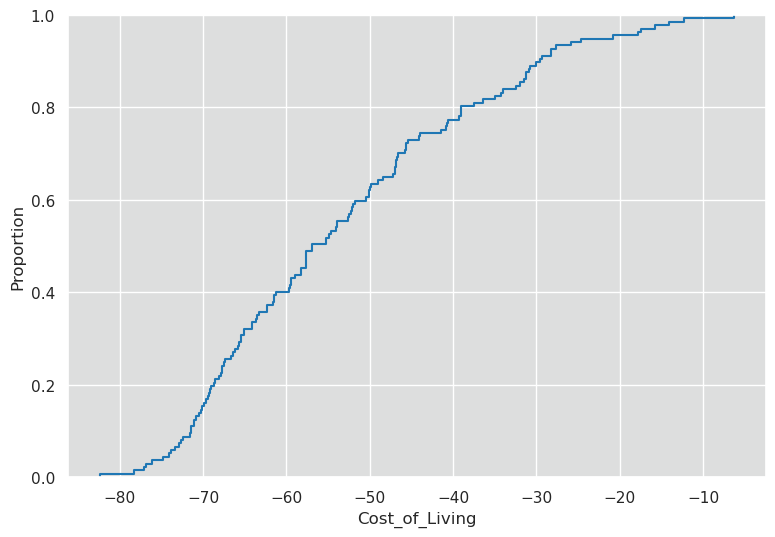

In [73]:
sns.ecdfplot(
    data = out_cost,
    x = 'Cost_of_Living'
)

#### Using empiricaldist

In [74]:
cdf_cost = empiricaldist.Cdf.from_seq(
    out_cost['Cost_of_Living'],
    normalize= True
)

pmf_cost = empiricaldist.Pmf.from_seq(
    out_cost['Cost_of_Living'],
    normalize= True
)

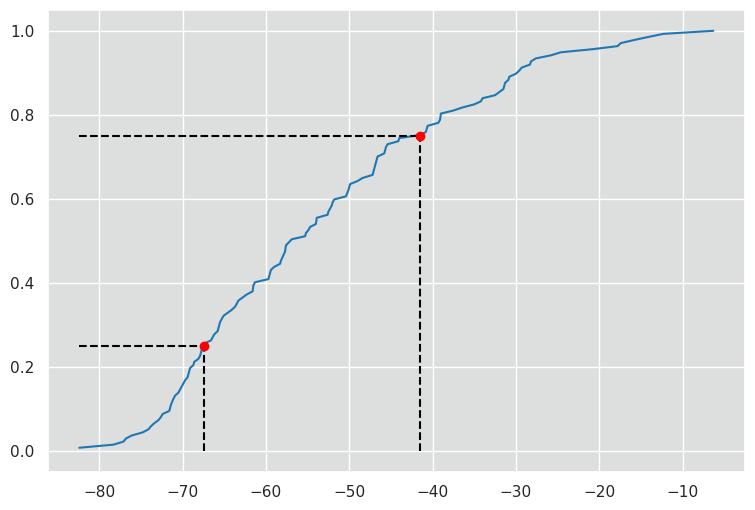

In [75]:
cdf_cost.plot()

p_1 = 0.25
p_2 = 0.75

ps = (0.25, 0.75)
qs = cdf_cost.inverse(ps)


plt.vlines(
    x = qs,
    ymin = 0,
    ymax = ps,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
    y = ps,
    xmin = pmf_cost.qs[0],
    xmax = qs,
    color = 'black',
    linestyle = 'dashed'
)


plt.scatter(
    x= qs,
    y = ps,
    color = 'red',
    zorder = 2
)

### All Continents

<Axes: xlabel='Cost_of_Living', ylabel='Proportion'>

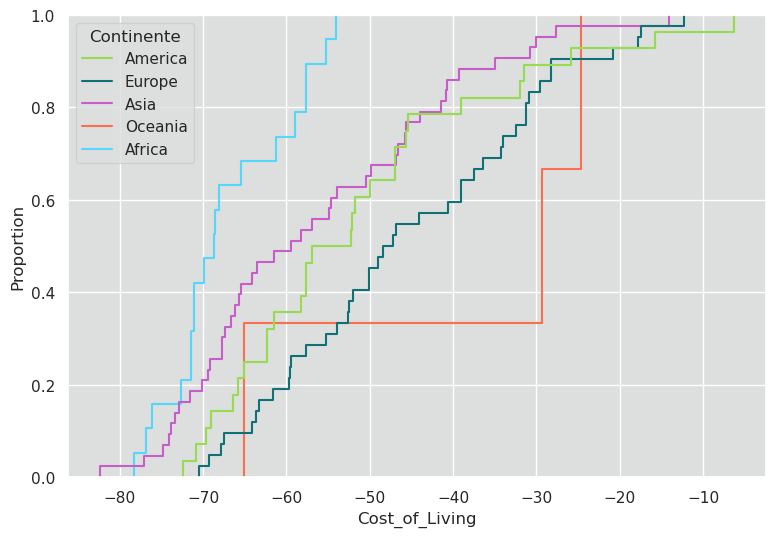

In [76]:
sns.ecdfplot(
    data = out_cost,
    x = 'Cost_of_Living',
    hue = 'Continente',
    palette = continent_color
)

<Axes: xlabel='Local_Purchasing_Power', ylabel='Proportion'>

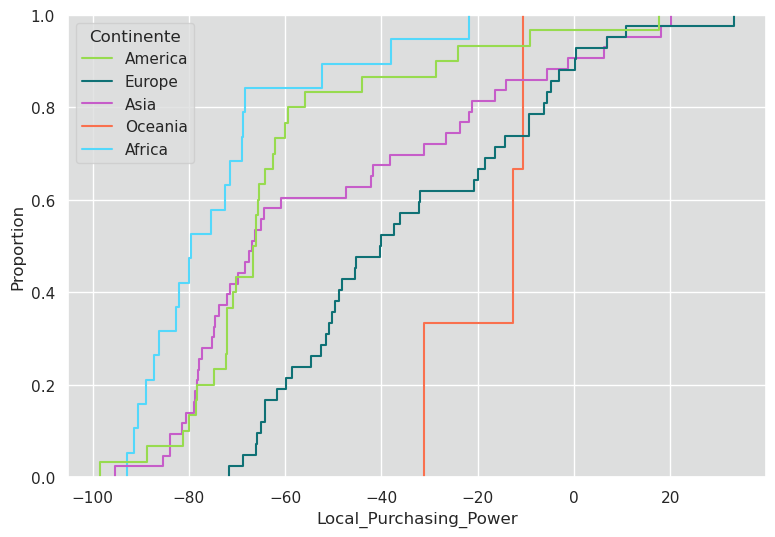

In [77]:
sns.ecdfplot(
    data = out_cost,
    x = 'Local_Purchasing_Power',
    hue = 'Continente',
    palette = continent_color
)

## Probability density function

### Local_Purchasing_Power

<Axes: xlabel='Local_Purchasing_Power', ylabel='Density'>

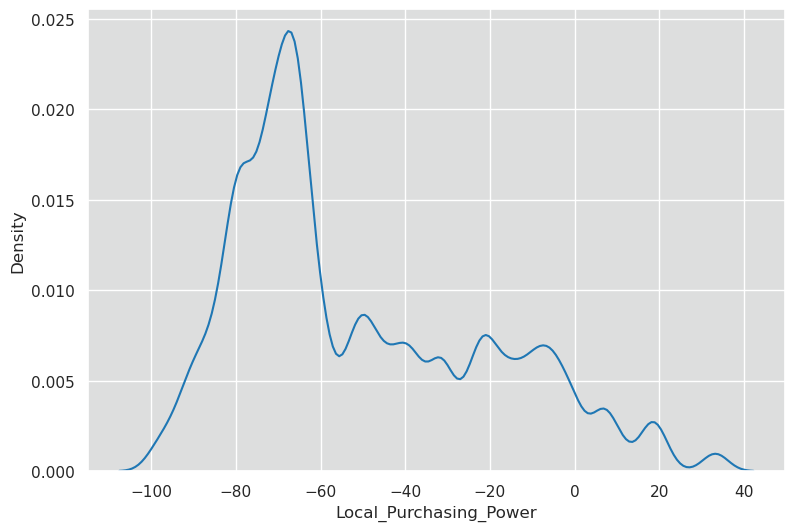

In [78]:
sns.kdeplot(
    data = out_cost,
    x = 'Local_Purchasing_Power',
    bw_method = 0.1
)

In [79]:
stats = out_cost['Local_Purchasing_Power'].describe()
stats

count    139.00000
mean     -50.95036
std       29.99500
min      -98.50000
25%      -72.30000
50%      -62.60000
75%      -29.90000
max       33.20000
Name: Local_Purchasing_Power, dtype: float64

<Axes: >

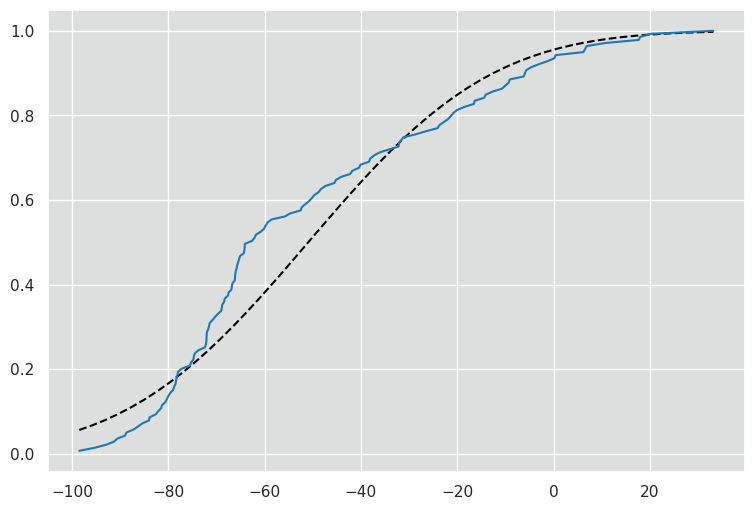

In [80]:
xs = np.linspace(stats['min'], stats['max']) #array de valores
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) #valores de probabilidad

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    out_cost['Local_Purchasing_Power'],
    normalize = True
).plot()

<Axes: xlabel='Local_Purchasing_Power', ylabel='Density'>

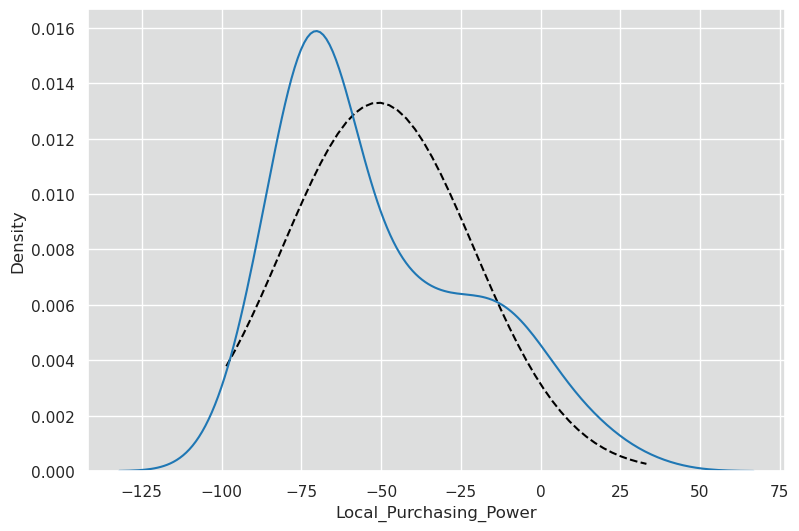

In [81]:
xs = np.linspace(stats['min'], stats['max']) #array de valores
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #valores de probabilidad

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data = out_cost,
    x = 'Local_Purchasing_Power' 
)

### Cost_of_Living

<Axes: xlabel='Cost_of_Living', ylabel='Density'>

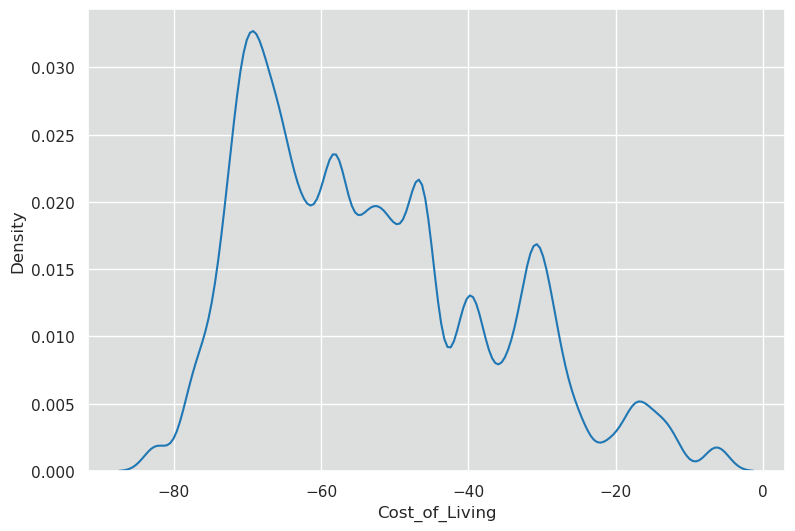

In [82]:
sns.kdeplot(
    data = out_cost,
    x = 'Cost_of_Living',
    bw_method= 0.1
)

<Axes: >

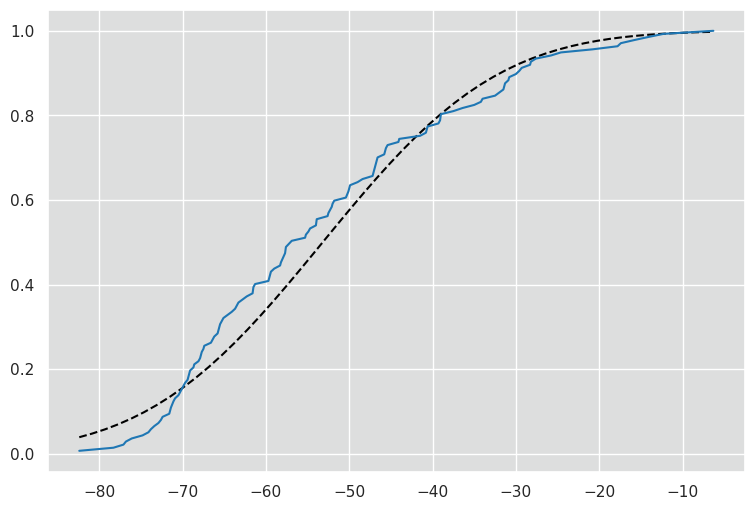

In [83]:
stats = out_cost['Cost_of_Living'].describe()

xs = np.linspace(stats['min'], stats['max']) #array de valores
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs) #valores de probabilidad

plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    out_cost['Cost_of_Living'],
    normalize = True
).plot()

<Axes: xlabel='Cost_of_Living', ylabel='Density'>

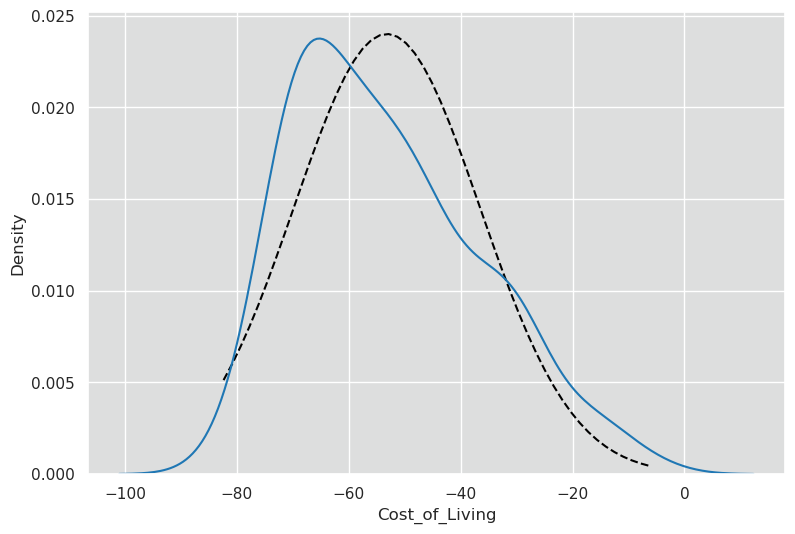

In [84]:
xs = np.linspace(stats['min'], stats['max']) #array de valores
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs) #valores de probabilidad

plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data = out_cost,
    x = 'Cost_of_Living' 
)

In [85]:
americ = out_cost.query('Continente == "America"')
afric = out_cost.query('Continente == "Africa"')
europa = out_cost.query('Continente == "Europe"')
#oceani = out_cost.query('Continente == "Oceania"')
asi = out_cost.query('Continente == "Asia"')

continentes = [americ, afric, europa, asi]

In [86]:
cols_numeric = out_cost.select_dtypes(np.number).columns
cols_numeric 

Index(['Cost_of_Living', 'Rent', 'Cost_Plus_Rent', 'Groceries',
       'Restaurant_Price', 'Local_Purchasing_Power'],
      dtype='object')

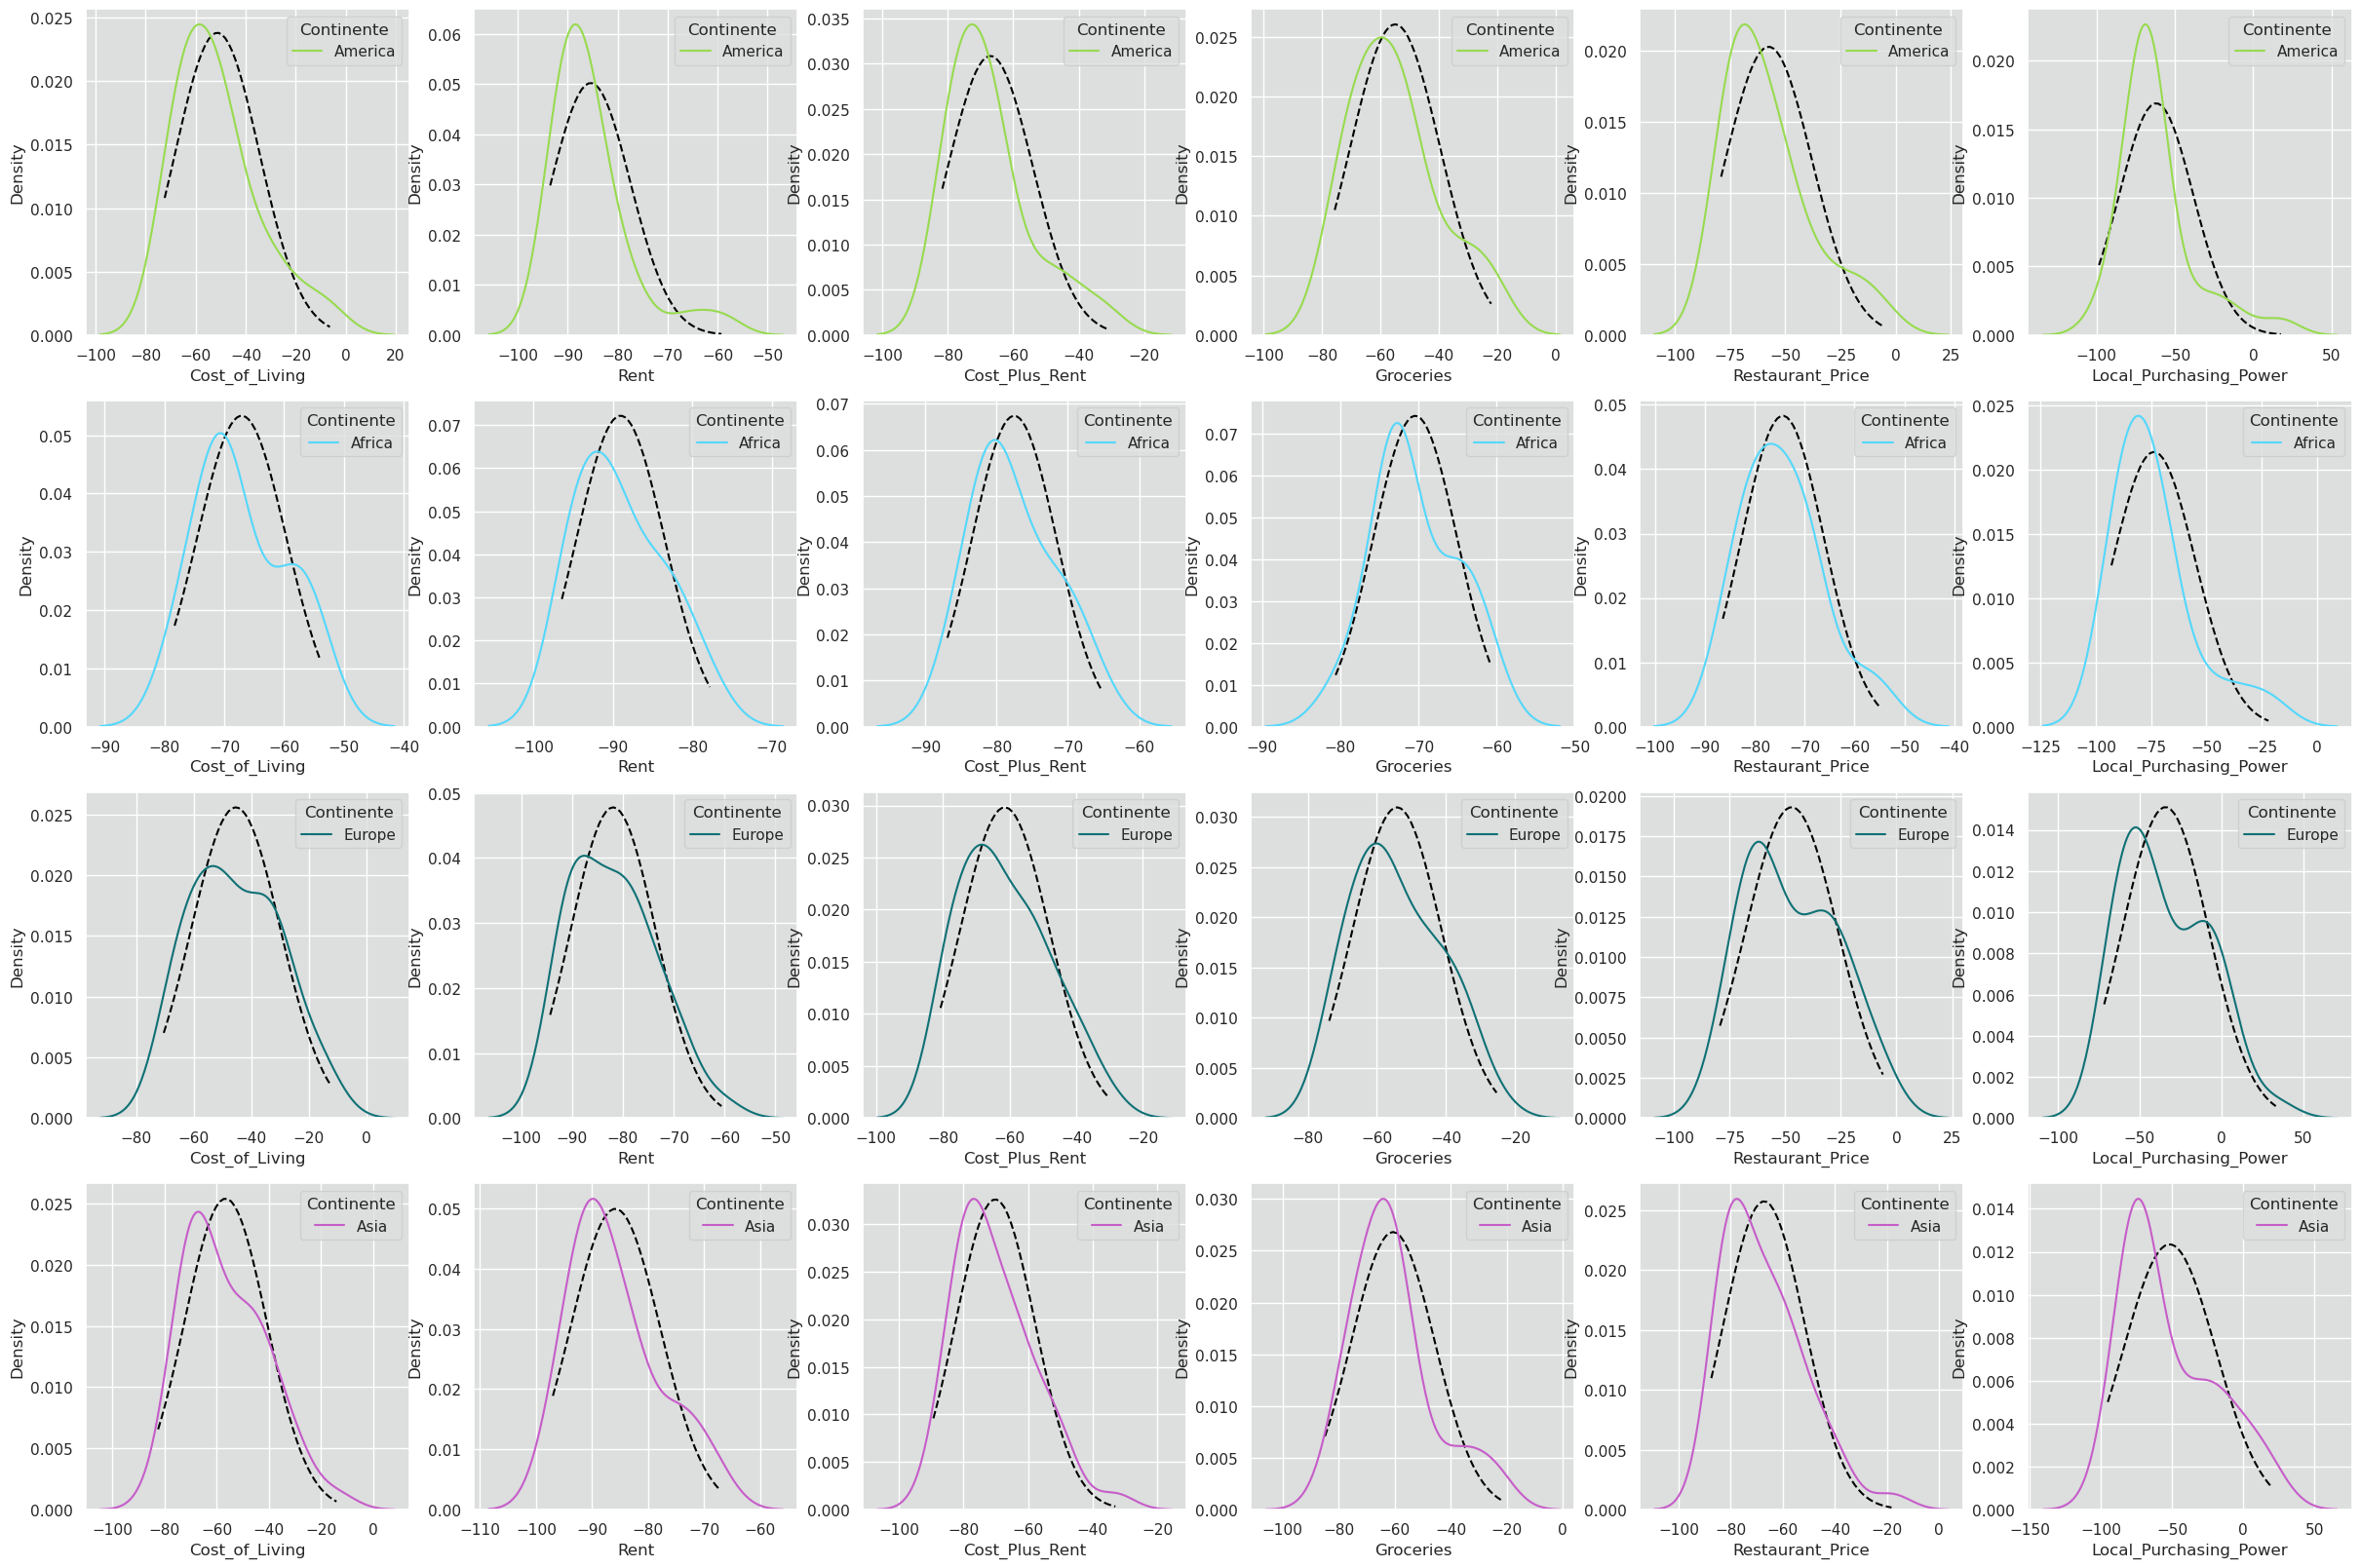

In [87]:
fig, ax = plt.subplots(4,6, figsize = (30,20))

for i, i_col in enumerate(continentes):
    for j, j_col in enumerate(cols_numeric):
        stats = i_col[j_col].describe()

        xs = np.linspace(stats['min'], stats['max'])
        ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

        ax[i][j].plot(xs, ys, color = 'black', linestyle = '--')

        sns.kdeplot(
            ax = ax[i][j],
            data = i_col,
            x = j_col,
            hue = 'Continente',
            palette = continent_color
        )

In [88]:
americ = df_cost.query('Continente == "America"')
afric = df_cost.query('Continente == "Africa"')
europa = df_cost.query('Continente == "Europe"')
#oceani = df_cost.query('Continente == "Oceania"')
asi = df_cost.query('Continente == "Asia"')

continentes = [americ, afric, europa, asi]

cols_numeric = df_cost.select_dtypes(np.number).columns

In [89]:
# fig, ax = plt.subplots(4,6, figsize = (30,20))

# for i, i_col in enumerate(continentes):
#     for j, j_col in enumerate(cols_numeric):
#         stats = i_col[j_col].describe()

#         xs = np.linspace(stats['min'], stats['max'])
#         ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

#         ax[i][j].plot(xs, ys, color = 'black', linestyle = '--')

#         sns.kdeplot(
#             ax = ax[i][j],
#             data = i_col,
#             x = j_col,
#             hue = 'Continente',
#             palette = continent_color
#         )

In [90]:
out_cost.dropna(inplace=True)

In [91]:
sample = out_cost['Local_Purchasing_Power'].to_numpy()

model = KernelDensity(bandwidth=10, kernel = 'gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=10)

In [92]:
values = np.asarray([value for value in range(-100, 80)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

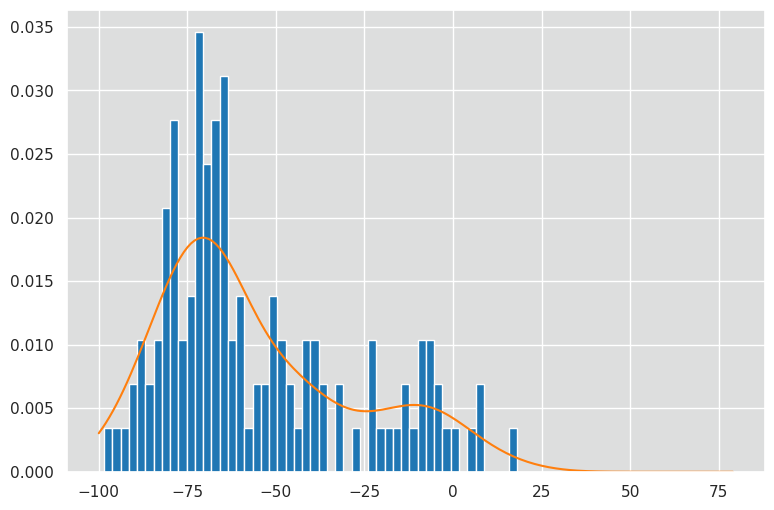

In [93]:
plt.hist(sample, bins = 50, density= True)
plt.plot(values, probabilities)
plt.show()

In [94]:
cost = out_cost['Cost_of_Living'].to_numpy()

model = KernelDensity(bandwidth=10, kernel = 'gaussian')
sample = cost.reshape((len(cost), 1))
model.fit(sample)

values_1 = np.asarray([value for value in range(-100, 80)])
values_1 = values.reshape((len(values_1), 1))
probabilities = model.score_samples(values_1)
probabilities = np.exp(probabilities)

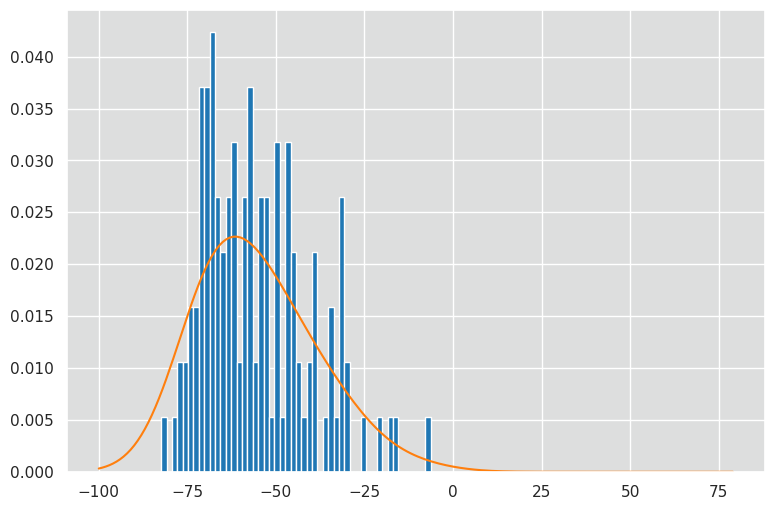

In [95]:
plt.hist(cost, bins = 50, density= True)
plt.plot(values_1, probabilities)
plt.show()

In [96]:
import os

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = 'bestCountry/cost/'

# Obtener la lista de archivos en el directorio
archivos = os.listdir(ruta_directorio)

# Inicializar el DataFrame final
df_final = pd.DataFrame()

# Iterar sobre los archivos en el directorio
for archivo in archivos:
    if archivo.endswith('.csv'):
        # Construir la ruta completa del archivo
        ruta_archivo = os.path.join(ruta_directorio, archivo)
        
        # Cargar el DataFrame desde el archivo CSV
        df = pd.read_csv(ruta_archivo)
        
        # Extraer el año del nombre del archivo (asumiendo que el formato es 'nombre-año.csv')
        year = int(archivo.split('-')[1].split('.')[0])
        
        # Determinar el semestre según el nombre del archivo
        semester = 2 if '-mid.csv' in archivo else 1
        
        # Agregar las columnas 'time' y 'Semester' con los valores correspondientes
        df['year'] = year
        df['Semester'] = semester
        
        # Concatenar el DataFrame actual al DataFrame final
        df_final = pd.concat([df_final, df], ignore_index=True)

# Mostrar el DataFrame final
df_final[(df_final['year'] == 2019) & (df_final['Semester'] == 2)]



,Country,Cost_of_Living,Rent,Cost_Plus_Rent,Groceries,Restaurant_Price,Local_Purchasing_Power,year,Semester
2781,Cayman Islands,141.6,74.4,109.5,157.9,105.0,137.9,2019,2
2782,Bermuda,138.2,87.6,114.0,124.9,150.4,79.9,2019,2
2783,Switzerland,122.7,50.2,88.0,121.3,124.0,127.8,2019,2
2784,Norway,104.5,37.3,72.3,93.9,115.6,98.0,2019,2
2785,Us Virgin Islands,97.2,48.2,73.8,87.4,90.7,54.6,2019,2
...,...,...,...,...,...,...,...,...,...
2912,Tunisia,25.4,5.2,15.7,23.5,14.0,37.6,2019,2
2913,Syria,25.3,5.4,15.8,22.8,20.8,12.4,2019,2
2914,India,25.1,6.0,16.0,25.2,17.5,61.7,2019,2
2915,Afghanistan,24.5,4.3,14.8,18.8,17.1,28.9,2019,2


In [97]:
import os

# Ruta del nuevo directorio para guardar los archivos
ruta_nueva_carpeta = 'combined'

# Crear el nuevo directorio si no existe
if not os.path.exists(ruta_nueva_carpeta):
    os.makedirs(ruta_nueva_carpeta)

# Construir la ruta completa para guardar el DataFrame final
ruta_archivo_final = os.path.join(ruta_nueva_carpeta, 'cost_complete.csv')

# Verificar si el archivo ya existe antes de guardarlo
if not os.path.exists(ruta_archivo_final):
    df_final.to_csv(ruta_archivo_final, index=False)
    print(f"DataFrame guardado exitosamente en: {ruta_archivo_final}")
else:
    print(f"El archivo {ruta_archivo_final} ya existe. No se ha sobreescrito.")


El archivo combined/cost_complete.csv ya existe. No se ha sobreescrito.
